# Todo list

A ajouter d'ici mardi, envoi du PDF à Christophe:

ENE : Elodie Noëlé

ACI : Aurélien Casagrandi 

Pour les data, dans la partie Introduction:
- Penser à ajouter deux folders dans le folder data (données californiennes SCEDC & données françaises (LDG)) DONE
- Ajouter les histogrammes 1D et 2D (composantes 2 à 2) pour les données californiennes et françaises(?) des magnitudes, des profondeurs et des coordonnées du seisme. [ACI & ENE]

- Pour les signaux affichés dans la partie Introduction, ajouter les directions (NS, EW, Up-Down) [ACI] DONE

- Finir l'introduction par le graphe, mentionner pourquoi on utilise les 72 stations ( plus de 20 ans de données). [ACI] HALF DONE

- Préciser si les distances de calcul pour le graphe sont géodésiques ou non (à contrôler dans le script de visualisation.py). Ajouter aussi les côtes des arêtes sur les graphes affichés. Vérifier le nombre de voisins (4 ou 5, vérifier si le noeud est considéré comme un voisin de lui-même ou non, notion de self-loop) choisis pour tracer le graphe. [ENE]

- Mettre les figures sur un fond de carte.  S'assurer de la cohérence des deux figures. [ENE]

Partie 1 :
- Commenter les  hyperparamètres définis dans la première partie du tutorial. [ACI] DONE

Partie 2:
- Commenter l'importance du bias dans l'affichage des erreurs. [ENE]

Partie 5 :
- Afficher les résultats avec les 10 folds pour les 10 optims, ainsi que les loss avec std. [ENE]

Nota bene : 
- Entre GNN2 et GNN3, mentionner la notion d'oversmoothing au travers du GNN2-1D et faire le lien entre le graphe spectrale et le graphe dynamique. [ENE]

- Dans la partie introduction : bien mentionner que pour le graphe dynamique, on modifie uniquement les relations soit l'espace E et non pas les noeuds appartenant à V. [ACI]

- Pour GNN3, extraire les graphes dynamiques entre chaque couche : montrer qu'à partir d'un certain nombre de couches, celui-ci n'évolue plus et tend à se concentrer autour de l'évènement. [ACI]

- Verifier le nombre de couches GCN retenus pour le GNN2. [ENE]

- (Optionnel) Faire un traitement analogue avec les données françaises (LDG) [ENE/ACI]

- Préparer un exemple (wave equation) avec un GNO. [ENE]

- Utiliser Optuna pour faire varier ses paramètres avec les graphes & les contour plots. [ENE]

# POUR LA PARTIE SUR LE DYNAMIQUE

This dynamic graph is only caculated from the features of the signal, through a set of layers that produce outputs 
of size 64 per node (station).

This output of size 64 per node is the encoded signal corresponding to its node (station) produced by the layer.

Hence, each layer encodes the information of the signal that it gets as entry and creates a new graph.

This means that the geographical location of the stations are not modified in these layers, only the feature distance between each is.

As a result, we have a set of layers that works on the features of the signal and allows us to create a new graph which edges are the euclidian distances of the output of each node (station).

################################################################################################################

################################################################################################################

################################################################################################################

# Actual Tutorial Zone

# Seismic Source Characterization with Graph Neural Networks (Live Demo Tutorial)

## Credits Zone
Xavier Cassagnou, Aurélien Casagrandi, Elodie Noëlé, Christophe Millet, Mathilde Mougeot

## Environment setup


## 1. Introduction


<img src="./images/otice_seismic_network.png" alt="" />

**What's at stake?** : Seismic event monitoring plays a crucial role in the Comprehensive Nuclear-Test-Ban Treaty (CTBT) surveillance by providing a reliable means to detect and identify underground nuclear explosions. By continuously recording and analyzing seismic waves generated by earthquakes and other subsurface activities, monitoring stations can distinguish between natural seismic events and potential nuclear tests based on wave characteristics, depth, and location. This capability ensures timely and accurate verification of compliance with the treaty, helping to deter clandestine nuclear testing and promote global nuclear non-proliferation and security. The worldwide seismic monitoring network supporting the CTBT is a global, integrated system composed of hundreds of seismic stations distributed strategically across the globe to maximize detection sensitivity. This global network is interconnected with numerous country-level and regional seismic networks, facilitating data sharing, cross-validation, and enhanced resolution of event detection. Such cooperation among international, national, and regional networks strengthens the overall robustness and reliability of CTBT verification efforts by combining local expertise and infrastructure with global monitoring capabilities.



#### Southern California Seismic Network (SCSN)

We use the data of this seismic stations network by recuperating it from the **Southern California Earthquake Data Center (SCEDC)**. The data is gathered by a set of 211 stations (we will only use 72 of those) and is composed of recorded waveforms on 3 spatial dimensions from each station of 4881 seismic events.

Those events are listed alongside an estimation of their location (latitude and longitude), their magnitude and their depth (the four informations that the model is supposed to predict).


Here is an example of waveforms received by two different stations (ADO and ALP) for the same seismic event.


<img src="./images/visu_series.jpeg" alt="" />

Amongst all those events and stations, we only select a few through filtering in order to get data with better quality and save computation and storage costs.

In the dataset that we will use here, we chose the events which are :

 - at least clearly detected by 5 stations on 20/40Hz frequencies (for the knn method)
 - separated from other events by at least 200 seconds
 
Those filtered events are detected by a set of 72 stations amongst the 211 original stations. 
Hence, we only take those 72 stations to save computation and storage costs.

You can also find the spatial position knn method results allowing to compute the graph for all the stations and 5-neighbourhood for each station :


<img src="./images/visu_graphe.jpeg" alt="" />


**Context:** Assuming that a seismic network is modeled as a graph, with seismic stations constituting the nodes and the spatial relationships between stations representing the edges, the seismic waveform signals associated with each station can be defined as the network's edges. For each of these waveforms, the North-South, East-West, and Up-Down components are identifiable. The objective of this study is to develop a function capable of predicting earthquake source parameters, including latitude, longitude, depth, and magnitude, from multi-station waveforms.

<img src="./images/Seismic_map.png" alt="" />


**Goal:** Predict the location (latitude, longitude), magnitude, and depth of a seismic event using a Graph Neural Network (GNN).

**Why GNNs?**
Machine learning models are increasingly used in geophysical applications, particularly for problems involving large, complex, and noisy datasets. Traditional ML models like decision trees, SVMs, or fully connected neural networks treat data as independent samples. However, seismic data collected from a network of stations is inherently relational — the response at one station is correlated with others due to spatial proximity and shared wave propagation paths.

Graph Neural Networks (GNNs) are a class of deep learning models designed to work directly on graph-structured data. They extend the idea of convolutional neural networks (CNNs) to graphs, enabling learning from both node features and the connectivity of the data.

<span style="color:red">**Working in progress : Neighboorhoods using spatial relationship and similarity relationship figures **</span>




***Mathematical Formalism of GNNs (fig 2.)***
<img src="./images/graph_explanation.png" alt="Example Image" style="height:1500px;  float: left; margin-right: 1px;"/>
<div>

This is the text next to the image. It will appear on the right side, wrapping nicely.
Let a graph (fig 1.) be defined as $ G = (V, E)$, with:
- $ V $: a set of nodes (e.g., seismic stations)
- $ E $: a set of edges (e.g., connectivity based on location or signal correlation)
- $ A \in \mathbb{R}^{N \times N} $: the adjacency matrix (fig 2.)
- $ X \in \mathbb{R}^{N \times d} $: the feature matrix with $ d $-dimensional node features

<br> <br><br> <br><br> <br><br> <br>  <br> <br><br> <br><br> <br><br> <br>  <br> <br><br> <br><br> <br><br> <br>     
    
    
The general form of message-passing GNNs (fig 4.) is:

$$ h_i^{(k+1)} = \gamma^{(k)}\left( h_i^{(k)}, \square_{j \in \mathcal{N}(i)} \phi^{(k)}(h_i^{(k)}, h_j^{(k)}, e_{ij}) \right) $$

Where:
- $ h_i^{(k)} $: hidden representation of node $ i $ at layer $ k $
- $ \mathcal{N}(i) $: neighborhood of node $ i $
- $ \phi $: message function
- $ \gamma $: update function (e.g., MLP)
- $ \square $: aggregation function (e.g., sum, mean, max)

    
    
    
A common simplification is the Graph Convolutional Network (GCN) (fig 5.):

$$ H^{(l+1)} = \sigma\left( \hat{D}^{-1/2} \hat{A} \hat{D}^{-1/2} H^{(l)} W^{(l)} \right) $$

Where:
- $ \hat{A} = A + I $ adds self-loops
- $ \hat{D} $ is the degree matrix of $ \hat{A} $
- $ W^{(l)} $: learnable weights
- $ \sigma $: nonlinearity (e.g., ReLU)

    
**In this context:**
- **Nodes** represent seismic stations with their corresponding signal features (e.g., waveform descriptors).
- **Edges** represent the relationships or distances between stations (e.g., geographic, signal correlation).

GNNs aggregate and transform features through message passing between nodes, capturing both local and global patterns in the data.

</div>




**Benefits of GNNs for Seismic Analysis:**
- Incorporate spatial structure of seismic networks
- Handle variable network topologies
- Improve generalization by leveraging relational inductive bias

**Live Demo Steps:**
1. Load preprocessed graph data
2. Load pre-trained GNN
3. Run offline inference
4. Visualize prediction vs. truth


In [283]:
# Uncomment if required
#!pip install torch torchvision torchaudio torch-geometric matplotlib seaborn geopandas

import pandas as pd
import os, pickle, torch, timeit
import numpy as np
from torchinfo import summary
from tqdm import tqdm
import gc
from modules import utils as ut
from modules import model as md
torch.cuda.empty_cache()
gc.collect()

seed = 0
device= "cuda:1"
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
folder = os.path.join(os.getcwd(), "./data")
data = [os.path.join(folder, f"data-{i}.pkl") for i in range(10)]

# A commenter
folder = os.path.join(os.getcwd(), 'example')
train_file = data[:-1] 
valid_file = data[-1]
model_file = "model.pt"
model_name = "GNN1" # The model used (GNN1, GNN1D, GNN2,GNN2D, GNN3)
n_epochs = 800  # The number of rounds of training
batch_size = 32 # The size of batches for training
lr = 0.0002 # The learning rate
dropout_rate = 0.15  # The probability for each node to be deactivated at each epoch 
K = 5 # The value of k that is chosen for the knn method
nlayers = 12 # The number of layers in the blocks
concat = True # The decision to use the concatenation or not
L2 = False  # The decision to use L2 as loss function (=True) or L1 (=False)

arrData = [np.load(file, allow_pickle=True) for file in train_file]



In [299]:

import matplotlib.pylab as pylab

params = {'legend.fontsize': 'xx-large',       # Taille des légences
          'figure.figsize': (15, 5),                        # Taille initiale des figures
         'axes.labelsize': 'xx-large',                   # Taille des titres
         'axes.titlesize':'xx-large',                     # Taille des titres de figures
         'xtick.labelsize':'xx-large',                   # Taille des titres des abscisses
         'ytick.labelsize':'xx-large',                   # Taille des titres des ordonnées
         'font.size' : 10.0,                                 # Taille du texte
         'font.family': 'DejaVu Sans',                # Paramètre 1 de police du texte
         'font.serif': 'Times New Roman',         # Paramètre 2 de police du texte
         'font.style': 'normal',                          # Paramètre 3 de police du texte
         'xtick.direction' : 'inout',                     # Sens des abscisses
         'ytick.direction' : 'inout',                     # Sens des ordonnées
         'xtick.major.size' : 5,                          # Espacement entre les abscisses
         'ytick.major.size' : 5}                         # Espacement entre les ordonnées

pylab.rcParams.update(params)                 # Mise à jour globale



## 2. Architecture overview

### General framework
We have a seismic network modeled as a graph $ G = (V, E) $, where:
- $V$ corresponds to the $N \in \mathbb{N_*}$ seismic stations $s$ (nodes $v_s \in V $) for which a seismic signal waveform of $P \in \mathbb{N_*}$ time steps and three components (North-South, East-West, Up-Down) $x_s \in \mathbb{R}^{Px3} $ and geographic coordinates (latitude and longitude) $p_s \in \mathbb{R}^2$ are associated
- $E$ corresponds to the spatial relationships between the stations (edges) to be defined and learn through the networks.

From the data of this seismic network, we want to compute the source parameters $y \in \mathbb{R}^4$, a seismic event's latiude, longitude, depth and magnitude.

To do such, our aim to learn a function $h_{\theta}$ such as : 

$\begin{array}{ccccc}
h_{\theta} & : & \mathbb{R}^{NxPx3}x\mathbb{R}^{Nx2}x\mathbb{E}(G) & \to & \mathbb{R}^4 \\
 & & x, p, G & \mapsto & y \\
\end{array}$


Inspired by the works on GNN (missing references and explanation), we designed a three component-archicture
such as $ y = h^{(3)}_{\theta^{(3)}} \big( \max_{1 \leq s \leq N} h^{(2)}_{\theta^{(2)}} (p_s, h^{(1)}_{\theta^{(1)}}(x_s)) \big) $:
- $h^{(1)}_{\theta^{(1)}}$, a CNN-based encoder for extracting the temporal features of the seismic waveforms for each seismic station
- $h^{(2)}_{\theta^{(2)}}$, a fully-connected neural network to concatenate the latent temporal features with the station geographic coordinates.
- $h^{(3)}_{\theta^{(3)}}$, a MLP for predicting the source parameters from the spatially enhanced vectors.

In the following paragraphs, we will review each architecture component

### CNN-based encoder $h^{(1)}_{\theta^{(1)}}$

The first component of the architecture $h^{(1)}_{\theta^{(1)}}$ is based on multiple temporal convolutions (Conv2d) applied on the temporal waveform $x_s$ associated with each station $s$ of the nodes $V$. It contains five sub-components denoted as TimeBlock with $L$ convolutional layers :

<img src="./images/TimeBlock.png" alt="" />

This 2D convolution of kernel size (1,5) is applied for each time step $n \in \{1, ..., P\} $ and for each feature channel $i$ of a waveform $x_s$ such as :


$$ x^{(l)}_{si}[n] = ReLU \Big( b_i^{(l)} + \sum_{j=1}^{d_{l-1}} \underbrace{W^{(l)}_{ji} * x_{sj}^{(l-1)}[n]}_{{\substack{\text{convolution operator} \\ \sum^4_{k=0} w^{(l)}_{jik}x^{(l-1)}_{sj} [n+k]}}} \Big) $$

For this sub-component, the total number of learnable weights is : $\sum^L_{l=1} d_l(4d_{l+1}+1)$
Then, to reduce the size of the output vector, a global max pooling-layer is applied on the output of the convolutional layers after a dropout operation for avoiding overfitting.

In [286]:

class TimeBlock(nn.Module):
    """
    Neural network block that applies 3 temporal convolutions to each node of a graph in isolation.
    """

    def __init__(self, n_layers, in_channels, out_channels, kernel_size=5, activ = F.relu, dropout = 0, pool_kernel_size = (1,1)):
        """
        :param in_channels: Number of input features at each node in each time step.
        :param out_channels: Desired number of output channels at each node in each time step.
        :param kernel_size: Size of the 1D temporal kernel.
        """
        super(TimeBlock, self).__init__()
        
        self.layers = nn.ModuleList()
        self.layers.append(nn.Conv2d(in_channels, out_channels, (1, kernel_size)))
        for i in range(1, n_layers):
            self.layers.append(nn.Conv2d(out_channels, out_channels, (1, kernel_size)))
            
        self.activ = activ
        self.dropout = nn.Dropout2d(dropout)
        self.pooling = nn.MaxPool2d(pool_kernel_size)
        
        for l in self.layers:
            nn.init.orthogonal_(l.weight)

    def forward(self, X):
        """
        :param X: Input data of shape (batch_size, num_features=in_channels, num_nodes, num_timesteps)
        :return: Output data of shape (batch_size, num_features=out_channels, num_nodes, num_timesteps_out)
        """
        for i in range(len(self.layers)):
            X = self.layers[i](X)
            X = self.activ(X)
            X = self.dropout(X)
        X = self.pooling(X)
                        
        return X
    
    

To avoid an abrupt reduction in sequence length at the final stage, intermediate pooling layers are introduced between convolutional layers, allowing for a more gradual and controlled reduction, so that this component is composed of five TimeBlocks with a total $\sum^5_{t=1} \sum^{L^{(t)}}_{l=1} d^{(t)}_l(4d^{(t)}_{l+1}+1)$ learnable weights

<img src="./images/CNN.png" alt="" />

The aim of this architecture is to get a latent representation $\tilde{x_s}$ of the signal waveform of each station for capturing temporal characteristic patterns.


In [287]:

        
class CNN(nn.Module):

    def __init__(self, in_channels, dropout = 0):
        
        super(CNN, self).__init__()
        
        self.layers = nn.ModuleList()
        self.layers.append(TimeBlock(n_layers = 3, in_channels = in_channels, out_channels = 8, kernel_size = 5, activ = F.relu, dropout = dropout, pool_kernel_size = (1,4)))
        self.layers.append(TimeBlock(n_layers = 3, in_channels = 8, out_channels = 16, kernel_size = 5, activ = F.relu, dropout = dropout, pool_kernel_size = (1,4)))
        self.layers.append(TimeBlock(n_layers = 3, in_channels = 16, out_channels = 32, kernel_size = 5, activ = F.relu, dropout = dropout, pool_kernel_size = (1,4)))
        self.layers.append(TimeBlock(n_layers = 2, in_channels = 32, out_channels = 64, kernel_size = 5, activ = F.relu, dropout = dropout))
        self.layers.append(TimeBlock(n_layers = 1, in_channels = 64, out_channels = 64, kernel_size = 5, activ = F.tanh, dropout = 0, pool_kernel_size = (1,16)))
        
        # Taille du signal
        # 2048 -> 2044 -> 2040 -> 2036 -> 509
        # 509 -> 505 -> 501 -> 497 -> 124
        # 124 -> 120 -> 116 -> 112 -> 28
        # 28 -> 24 -> 20 -> 16 -> 1

    def forward(self, X):
        """
        :param X: Input data of shape (batch_size, num_features=in_channels, num_nodes, 2048)
        :return: Output data of shape (batch_size, num_features=64, num_nodes, 1)
        """
        
        for l in self.layers:
            X = l(X)
            
        return X

### FCNN for aggregating latent temporal features with stations geographic coordinates $h^{(2)}_{\theta^{(2)}}$

From this reduced vector $\tilde{x_s}$, we want to include the information coming from the geographic coordinates of the stations. To do so, we aggregate the vectors to get an enhanced feature vector $\hat{x_s} = \tilde{x_s} || p_s $ on which a TimeBlock is applied for performance improvment and obtain a lower-dimension latent representation vector of the aggregated data.

<img src="./images/TimeBlock.png" alt="" />

### Source parameters prediction with the MLP $h^{(3)}_{\theta^{(3)}}$

For the third and last component, we use a component-wise max pooling layer followed by a 2-layers MLP for the prediction of the target source parameters from enhanced feature vectors $\hat{x_s}$. So that:
$$ y = \sigma_2 \big(W_2 \sigma_1(W_1 \underbrace{z}_{\max_{1 \leq s \leq N} \hat{x_s}} + b_1) + b_2 \big)$$

<img src="./images/MLP.png" alt="" />

In [288]:

        
       
        
class MLP(nn.Module):

    def __init__(self, num_nodes, in_channels, dropout = 0):

        super(MLP, self).__init__()

        self.pooling = nn.MaxPool2d((num_nodes,1))
        self.MLP1 = nn.Linear(in_channels, 128)
        self.MLP2 = nn.Linear(128, 4)
        nn.init.orthogonal_(self.MLP1.weight)
        nn.init.orthogonal_(self.MLP2.weight)
        self.dropout = nn.Dropout(dropout)
            

    def forward(self, X):
        """
        :param X: Input data of shape (batch_size, in_channels, num_nodes, 1)
        :return: Output data of shape (batch_size, 4)
        """
        X = torch.squeeze(self.pooling(X))
        X = F.relu(self.MLP1(X))
        X = self.dropout(X)
        X = F.tanh(self.MLP2(X))
        return X

### First architecture : Edgeless Graph Neural Network GNN1

This first architecture with the components set as described below is denoted Edgeless-GNN:
<img src="./images/GNN1.png" alt="" />

As the operation of $h^{(1)}_{\theta^{(1)}}$ and $h^{(2)}_{\theta^{(2)}}$ apply the same operations independently on each element, they are permutation-invariant and even permutation-equivariant (to be checked)

This terminology emphasizes the graph-like structure of the input while acknowledging
the absence of edge modeling and the architectural simplifications relative to classical
GNNs.

In [289]:

        
        
class GNN1(nn.Module):

    def __init__(self, in_channels, pos, dropout = 0):
        """
        :param in_channels: Number of input features at each node in each time step.
        :param pos: Positions of stations : shape (2, num_nodes)
        """
        
        super(GNN1, self).__init__()
        
        self.pos = pos
        
        self.CNNlayer = CNN(in_channels = in_channels, dropout = dropout)
        self.sblock = TimeBlock(n_layers = 2, in_channels = 66, out_channels = 128, kernel_size = 1, activ = F.relu, dropout = dropout)
        self.MLP = MLP(num_nodes = pos.shape[1], in_channels = 128, dropout = dropout)

    def forward(self, X):
        """
        :param X: Input data of shape (batch_size, num_features=in_channels, num_nodes, 2048)
        :param pos: Positions of stations : shape (2, num_nodes)
        :return: Output data of shape (batch_size, num_features=4)
        """
        
        X = self.CNNlayer(X)                                                    # Shape (batch_size, 64, num_nodes, 1)
        pos = self.pos.repeat(X.shape[0], 1, 1, 1).permute(0, 2, 3, 1)          # Shape (batch_size, 2, num_nodes, 1)
        X = torch.cat((X, pos), 1)                                              # Shape (batch_size, 66, num_nodes, 1)
        X = self.sblock(X)
        X = self.MLP(X)
        return X

#### Training

In [290]:
model = GNN1(x_train.shape[1], pos, dropout_rate).to(device)
print('Total params: ' + str(sum(p.numel() for p in model.parameters())))
summary(model, [1, 1, 42, 2048])


Total params: 110356


Layer (type:depth-idx)                   Output Shape              Param #
GNN1                                     [4]                       --
├─CNN: 1-1                               [1, 64, 42, 1]            --
│    └─ModuleList: 2-1                   --                        --
│    │    └─TimeBlock: 3-1               [1, 8, 42, 509]           704
│    │    └─TimeBlock: 3-2               [1, 16, 42, 124]          3,248
│    │    └─TimeBlock: 3-3               [1, 32, 42, 28]           12,896
│    │    └─TimeBlock: 3-4               [1, 64, 42, 20]           30,848
│    │    └─TimeBlock: 3-5               [1, 64, 42, 1]            20,544
├─TimeBlock: 1-2                         [1, 128, 42, 1]           --
│    └─ModuleList: 2-4                   --                        (recursive)
│    │    └─Conv2d: 3-6                  [1, 128, 42, 1]           8,576
│    └─Dropout2d: 2-3                    [1, 128, 42, 1]           --
│    └─ModuleList: 2-4                   --              

In [295]:
torch.cuda.empty_cache()
gc.collect()

#               x_train             y_train
# Dimension 0 : évènements          évènements
# Dimension 1 : directions (3)      labels (4)
# Dimension 2 : stations (50)       -
# Dimension 3 : temps (2048)        -

x_train, y_train = arrData[0][0], arrData[0][1]
for data_file in train_file[1:]:
    x_train = np.concatenate((x_train, arrData[0][0]), axis = 0)
    y_train = np.concatenate((y_train, arrData[0][1]), axis = 0)

x_train = torch.permute(torch.Tensor(x_train).to(device),(0,3,1,2))
y_train = torch.Tensor(y_train[:,1:]).to(device)
pos = torch.Tensor(arrData[0][2].T).to(device)
dist = torch.Tensor(arrData[0][3]).to(device)

(x_valid, y_valid, _, _) = np.load(valid_file, allow_pickle=True)
x_valid = torch.permute(torch.Tensor(x_valid).to(device),(0,3,1,2))
y_valid = torch.Tensor(y_valid[:,1:]).to(device)


model = md.GNN1(x_train.shape[1], pos, dropout_rate).to(device)

model_file = "model_GNN1.pt"

optimizer = torch.optim.Adam(model.parameters(),lr=lr)
if L2:
    criterion = nn.MSELoss().to(device)
else:
    criterion = nn.L1Loss().to(device)
    
loss_dict = {"train" : [],
            "valid" : []}
loss_valid_min = 0


earlyStopper = EarlyStopper(50, 0.0002)
for epoch in tqdm(range(n_epochs)):
    
    t1 = timeit.default_timer()
    inds = np.arange(len(x_train))
    np.random.shuffle(inds)
    
    lossAvg = 0
    count = 0
    
    for k in range(0, len(x_train)-batch_size, batch_size):
        inds_k = inds[k:k+batch_size]
        results = model(x_train[inds_k])
        loss = criterion(results,y_train[inds_k])

#        print(loss.item(),k,epoch,time()-t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossAvg = loss.item()
        count +=1
        
    lossAvg = lossAvg / count
    loss_dict["train"].append(lossAvg)

    # Early stopping
    with torch.no_grad():
        results_valid = model(x_valid)
    loss_valid = criterion(results_valid, y_valid)
    #print(loss_valid.item(), epoch, time()-t)
    if loss_valid_min == 0 or loss_valid_min > loss_valid.item():
        loss_valid_min = loss_valid.item()
        model_valid = model.state_dict()
    loss_dict["valid"].append(loss_valid.item())
    
    if earlyStopper.early_stop(loss_valid.item()):
        print(f'Epoch {epoch+1}/{n_epochs}: {t2-t1:.2f}s - Training loss = {lossAvg:.6f} - Validation loss = {loss_valid.item():.6f}')
        break
    
    t2 = timeit.default_timer()
    print(f'Epoch {epoch+1}/{n_epochs}: {t2-t1:.2f}s - Training loss = {lossAvg:.6f} - Validation loss = {loss_valid.item():.6f}')


torch.save(model_valid, folder+"/"+model_file)
np.save(folder+"/loss_"+model_file, loss_dict)
print(loss_valid_min)

  0%|          | 1/800 [00:11<2:30:04, 11.27s/it]

Epoch 1/800: 11.27s - Training loss = 0.002280 - Validation loss = 0.328324


  0%|          | 2/800 [00:22<2:29:02, 11.21s/it]

Epoch 2/800: 11.16s - Training loss = 0.002687 - Validation loss = 0.322081


  0%|          | 3/800 [00:33<2:30:05, 11.30s/it]

Epoch 3/800: 11.41s - Training loss = 0.002409 - Validation loss = 0.321468


  0%|          | 4/800 [00:45<2:32:07, 11.47s/it]

Epoch 4/800: 11.72s - Training loss = 0.002241 - Validation loss = 0.320410


  1%|          | 5/800 [00:57<2:32:07, 11.48s/it]

Epoch 5/800: 11.51s - Training loss = 0.002362 - Validation loss = 0.319457


  1%|          | 6/800 [01:08<2:33:24, 11.59s/it]

Epoch 6/800: 11.81s - Training loss = 0.002648 - Validation loss = 0.318933


  1%|          | 7/800 [01:20<2:33:45, 11.63s/it]

Epoch 7/800: 11.72s - Training loss = 0.002149 - Validation loss = 0.317633


  1%|          | 8/800 [01:32<2:33:25, 11.62s/it]

Epoch 8/800: 11.60s - Training loss = 0.002296 - Validation loss = 0.318394


  1%|          | 9/800 [01:43<2:33:24, 11.64s/it]

Epoch 9/800: 11.66s - Training loss = 0.002199 - Validation loss = 0.316835


  1%|▏         | 10/800 [01:55<2:33:37, 11.67s/it]

Epoch 10/800: 11.74s - Training loss = 0.002492 - Validation loss = 0.313800


  1%|▏         | 11/800 [02:07<2:33:55, 11.71s/it]

Epoch 11/800: 11.79s - Training loss = 0.002344 - Validation loss = 0.307826


  2%|▏         | 12/800 [02:19<2:34:08, 11.74s/it]

Epoch 12/800: 11.81s - Training loss = 0.001931 - Validation loss = 0.285070


  2%|▏         | 13/800 [02:30<2:33:44, 11.72s/it]

Epoch 13/800: 11.68s - Training loss = 0.002042 - Validation loss = 0.242064


  2%|▏         | 14/800 [02:42<2:32:41, 11.66s/it]

Epoch 14/800: 11.51s - Training loss = 0.001468 - Validation loss = 0.198633


  2%|▏         | 15/800 [02:53<2:32:00, 11.62s/it]

Epoch 15/800: 11.53s - Training loss = 0.001285 - Validation loss = 0.184466


  2%|▏         | 16/800 [03:05<2:32:55, 11.70s/it]

Epoch 16/800: 11.90s - Training loss = 0.001242 - Validation loss = 0.172206


  2%|▏         | 17/800 [03:17<2:33:20, 11.75s/it]

Epoch 17/800: 11.86s - Training loss = 0.001247 - Validation loss = 0.167135


  2%|▏         | 18/800 [03:29<2:33:18, 11.76s/it]

Epoch 18/800: 11.79s - Training loss = 0.001151 - Validation loss = 0.162938


  2%|▏         | 19/800 [03:41<2:32:33, 11.72s/it]

Epoch 19/800: 11.62s - Training loss = 0.001004 - Validation loss = 0.161159


  2%|▎         | 20/800 [03:52<2:32:46, 11.75s/it]

Epoch 20/800: 11.83s - Training loss = 0.000899 - Validation loss = 0.155514


  3%|▎         | 21/800 [04:04<2:32:10, 11.72s/it]

Epoch 21/800: 11.65s - Training loss = 0.000989 - Validation loss = 0.154730


  3%|▎         | 22/800 [04:16<2:32:32, 11.76s/it]

Epoch 22/800: 11.86s - Training loss = 0.001004 - Validation loss = 0.149830


  3%|▎         | 23/800 [04:28<2:32:44, 11.79s/it]

Epoch 23/800: 11.87s - Training loss = 0.000841 - Validation loss = 0.145248


  3%|▎         | 24/800 [04:40<2:33:50, 11.90s/it]

Epoch 24/800: 12.13s - Training loss = 0.001093 - Validation loss = 0.144271


  3%|▎         | 25/800 [04:52<2:32:54, 11.84s/it]

Epoch 25/800: 11.70s - Training loss = 0.000833 - Validation loss = 0.141252


  3%|▎         | 26/800 [05:04<2:33:25, 11.89s/it]

Epoch 26/800: 12.02s - Training loss = 0.000937 - Validation loss = 0.139842


  3%|▎         | 27/800 [05:16<2:33:09, 11.89s/it]

Epoch 27/800: 11.87s - Training loss = 0.000911 - Validation loss = 0.141541


  4%|▎         | 28/800 [05:28<2:35:09, 12.06s/it]

Epoch 28/800: 12.46s - Training loss = 0.001057 - Validation loss = 0.139572


  4%|▎         | 29/800 [05:40<2:34:51, 12.05s/it]

Epoch 29/800: 12.03s - Training loss = 0.000861 - Validation loss = 0.140861


  4%|▍         | 30/800 [05:52<2:35:29, 12.12s/it]

Epoch 30/800: 12.27s - Training loss = 0.000949 - Validation loss = 0.136560


  4%|▍         | 31/800 [06:05<2:35:50, 12.16s/it]

Epoch 31/800: 12.26s - Training loss = 0.001123 - Validation loss = 0.134531


  4%|▍         | 32/800 [06:17<2:34:56, 12.10s/it]

Epoch 32/800: 11.98s - Training loss = 0.000852 - Validation loss = 0.138070


  4%|▍         | 33/800 [06:29<2:34:44, 12.10s/it]

Epoch 33/800: 12.10s - Training loss = 0.000825 - Validation loss = 0.131893


  4%|▍         | 34/800 [06:41<2:34:29, 12.10s/it]

Epoch 34/800: 12.09s - Training loss = 0.000942 - Validation loss = 0.133661


  4%|▍         | 35/800 [06:53<2:33:52, 12.07s/it]

Epoch 35/800: 11.99s - Training loss = 0.000850 - Validation loss = 0.132362


  4%|▍         | 36/800 [07:05<2:33:38, 12.07s/it]

Epoch 36/800: 12.06s - Training loss = 0.001041 - Validation loss = 0.131779


  5%|▍         | 37/800 [07:17<2:34:09, 12.12s/it]

Epoch 37/800: 12.25s - Training loss = 0.000861 - Validation loss = 0.129542


  5%|▍         | 38/800 [07:29<2:34:33, 12.17s/it]

Epoch 38/800: 12.28s - Training loss = 0.000991 - Validation loss = 0.128839


  5%|▍         | 39/800 [07:41<2:33:06, 12.07s/it]

Epoch 39/800: 11.84s - Training loss = 0.000853 - Validation loss = 0.128535


  5%|▌         | 40/800 [07:53<2:32:47, 12.06s/it]

Epoch 40/800: 12.04s - Training loss = 0.000965 - Validation loss = 0.127766


  5%|▌         | 41/800 [08:05<2:32:05, 12.02s/it]

Epoch 41/800: 11.93s - Training loss = 0.001137 - Validation loss = 0.128521


  5%|▌         | 42/800 [08:17<2:32:27, 12.07s/it]

Epoch 42/800: 12.17s - Training loss = 0.000839 - Validation loss = 0.131486


  5%|▌         | 43/800 [08:29<2:31:48, 12.03s/it]

Epoch 43/800: 11.95s - Training loss = 0.000879 - Validation loss = 0.129328


  6%|▌         | 44/800 [08:41<2:31:26, 12.02s/it]

Epoch 44/800: 11.99s - Training loss = 0.000805 - Validation loss = 0.129632


  6%|▌         | 45/800 [08:53<2:31:19, 12.03s/it]

Epoch 45/800: 12.04s - Training loss = 0.000938 - Validation loss = 0.126641


  6%|▌         | 46/800 [09:05<2:30:41, 11.99s/it]

Epoch 46/800: 11.91s - Training loss = 0.000752 - Validation loss = 0.127325


  6%|▌         | 47/800 [09:17<2:30:19, 11.98s/it]

Epoch 47/800: 11.95s - Training loss = 0.000930 - Validation loss = 0.122774


  6%|▌         | 48/800 [09:30<2:31:40, 12.10s/it]

Epoch 48/800: 12.39s - Training loss = 0.000977 - Validation loss = 0.125799


  6%|▌         | 49/800 [09:42<2:32:17, 12.17s/it]

Epoch 49/800: 12.32s - Training loss = 0.000598 - Validation loss = 0.121110


  6%|▋         | 50/800 [09:54<2:31:59, 12.16s/it]

Epoch 50/800: 12.14s - Training loss = 0.000934 - Validation loss = 0.124670


  6%|▋         | 51/800 [10:06<2:31:41, 12.15s/it]

Epoch 51/800: 12.13s - Training loss = 0.000736 - Validation loss = 0.124171


  6%|▋         | 52/800 [10:18<2:30:44, 12.09s/it]

Epoch 52/800: 11.95s - Training loss = 0.000800 - Validation loss = 0.123378


  7%|▋         | 53/800 [10:30<2:30:08, 12.06s/it]

Epoch 53/800: 11.98s - Training loss = 0.000786 - Validation loss = 0.121533


  7%|▋         | 54/800 [10:42<2:29:16, 12.01s/it]

Epoch 54/800: 11.88s - Training loss = 0.000748 - Validation loss = 0.124152


  7%|▋         | 55/800 [10:54<2:28:04, 11.93s/it]

Epoch 55/800: 11.74s - Training loss = 0.000768 - Validation loss = 0.124155


  7%|▋         | 56/800 [11:05<2:27:17, 11.88s/it]

Epoch 56/800: 11.77s - Training loss = 0.000767 - Validation loss = 0.120453


  7%|▋         | 57/800 [11:17<2:27:17, 11.89s/it]

Epoch 57/800: 11.93s - Training loss = 0.000743 - Validation loss = 0.121536


  7%|▋         | 58/800 [11:29<2:27:03, 11.89s/it]

Epoch 58/800: 11.89s - Training loss = 0.000807 - Validation loss = 0.120668


  7%|▋         | 59/800 [11:41<2:27:06, 11.91s/it]

Epoch 59/800: 11.96s - Training loss = 0.000789 - Validation loss = 0.119866


  8%|▊         | 60/800 [11:53<2:26:56, 11.91s/it]

Epoch 60/800: 11.92s - Training loss = 0.000880 - Validation loss = 0.121117


  8%|▊         | 61/800 [12:05<2:27:03, 11.94s/it]

Epoch 61/800: 12.00s - Training loss = 0.000660 - Validation loss = 0.117571


  8%|▊         | 62/800 [12:17<2:26:24, 11.90s/it]

Epoch 62/800: 11.82s - Training loss = 0.000675 - Validation loss = 0.120537


  8%|▊         | 63/800 [12:29<2:25:07, 11.82s/it]

Epoch 63/800: 11.61s - Training loss = 0.000807 - Validation loss = 0.121226


  8%|▊         | 64/800 [12:40<2:24:10, 11.75s/it]

Epoch 64/800: 11.61s - Training loss = 0.000784 - Validation loss = 0.118971


  8%|▊         | 65/800 [12:52<2:23:35, 11.72s/it]

Epoch 65/800: 11.65s - Training loss = 0.000759 - Validation loss = 0.121590


  8%|▊         | 66/800 [13:03<2:23:03, 11.69s/it]

Epoch 66/800: 11.63s - Training loss = 0.000701 - Validation loss = 0.116591


  8%|▊         | 67/800 [13:15<2:22:34, 11.67s/it]

Epoch 67/800: 11.62s - Training loss = 0.000895 - Validation loss = 0.118285


  8%|▊         | 68/800 [13:27<2:22:06, 11.65s/it]

Epoch 68/800: 11.59s - Training loss = 0.000797 - Validation loss = 0.118823


  9%|▊         | 69/800 [13:38<2:21:52, 11.64s/it]

Epoch 69/800: 11.64s - Training loss = 0.000697 - Validation loss = 0.120813


  9%|▉         | 70/800 [13:50<2:21:52, 11.66s/it]

Epoch 70/800: 11.70s - Training loss = 0.000640 - Validation loss = 0.117971


  9%|▉         | 71/800 [14:02<2:21:49, 11.67s/it]

Epoch 71/800: 11.70s - Training loss = 0.000612 - Validation loss = 0.115994


  9%|▉         | 72/800 [14:14<2:22:20, 11.73s/it]

Epoch 72/800: 11.87s - Training loss = 0.000747 - Validation loss = 0.118502


  9%|▉         | 73/800 [14:26<2:23:14, 11.82s/it]

Epoch 73/800: 12.03s - Training loss = 0.000785 - Validation loss = 0.116883


  9%|▉         | 74/800 [14:37<2:23:12, 11.84s/it]

Epoch 74/800: 11.87s - Training loss = 0.000722 - Validation loss = 0.115782


  9%|▉         | 75/800 [14:49<2:22:14, 11.77s/it]

Epoch 75/800: 11.62s - Training loss = 0.000690 - Validation loss = 0.116336


 10%|▉         | 76/800 [15:01<2:21:28, 11.72s/it]

Epoch 76/800: 11.61s - Training loss = 0.000802 - Validation loss = 0.118366


 10%|▉         | 77/800 [15:12<2:21:27, 11.74s/it]

Epoch 77/800: 11.77s - Training loss = 0.000587 - Validation loss = 0.115674


 10%|▉         | 78/800 [15:24<2:20:48, 11.70s/it]

Epoch 78/800: 11.61s - Training loss = 0.000732 - Validation loss = 0.117688


 10%|▉         | 79/800 [15:36<2:20:31, 11.69s/it]

Epoch 79/800: 11.68s - Training loss = 0.000672 - Validation loss = 0.114393


 10%|█         | 80/800 [15:47<2:20:05, 11.67s/it]

Epoch 80/800: 11.62s - Training loss = 0.000689 - Validation loss = 0.113073


 10%|█         | 81/800 [15:59<2:19:38, 11.65s/it]

Epoch 81/800: 11.60s - Training loss = 0.000724 - Validation loss = 0.116372


 10%|█         | 82/800 [16:11<2:19:18, 11.64s/it]

Epoch 82/800: 11.61s - Training loss = 0.000737 - Validation loss = 0.115943


 10%|█         | 83/800 [16:22<2:18:58, 11.63s/it]

Epoch 83/800: 11.60s - Training loss = 0.000599 - Validation loss = 0.116061


 10%|█         | 84/800 [16:34<2:18:47, 11.63s/it]

Epoch 84/800: 11.63s - Training loss = 0.000707 - Validation loss = 0.113573


 11%|█         | 85/800 [16:46<2:19:54, 11.74s/it]

Epoch 85/800: 12.00s - Training loss = 0.000566 - Validation loss = 0.112925


 11%|█         | 86/800 [16:58<2:20:04, 11.77s/it]

Epoch 86/800: 11.84s - Training loss = 0.000701 - Validation loss = 0.113259


 11%|█         | 87/800 [17:10<2:20:05, 11.79s/it]

Epoch 87/800: 11.83s - Training loss = 0.000737 - Validation loss = 0.115748


 11%|█         | 88/800 [17:21<2:20:02, 11.80s/it]

Epoch 88/800: 11.83s - Training loss = 0.000590 - Validation loss = 0.113908


 11%|█         | 89/800 [17:33<2:20:00, 11.81s/it]

Epoch 89/800: 11.84s - Training loss = 0.000599 - Validation loss = 0.115238


 11%|█▏        | 90/800 [17:45<2:19:39, 11.80s/it]

Epoch 90/800: 11.77s - Training loss = 0.000639 - Validation loss = 0.114085


 11%|█▏        | 91/800 [17:57<2:19:38, 11.82s/it]

Epoch 91/800: 11.85s - Training loss = 0.000647 - Validation loss = 0.112709


 12%|█▏        | 92/800 [18:08<2:18:27, 11.73s/it]

Epoch 92/800: 11.54s - Training loss = 0.000546 - Validation loss = 0.113886


 12%|█▏        | 93/800 [18:20<2:17:35, 11.68s/it]

Epoch 93/800: 11.54s - Training loss = 0.000554 - Validation loss = 0.116819


 12%|█▏        | 94/800 [18:32<2:18:34, 11.78s/it]

Epoch 94/800: 12.01s - Training loss = 0.000751 - Validation loss = 0.112003


 12%|█▏        | 95/800 [18:44<2:20:07, 11.93s/it]

Epoch 95/800: 12.27s - Training loss = 0.000591 - Validation loss = 0.115705


 12%|█▏        | 96/800 [18:56<2:21:15, 12.04s/it]

Epoch 96/800: 12.30s - Training loss = 0.000513 - Validation loss = 0.114089


 12%|█▏        | 97/800 [19:08<2:20:14, 11.97s/it]

Epoch 97/800: 11.81s - Training loss = 0.000656 - Validation loss = 0.113118


 12%|█▏        | 98/800 [19:20<2:19:37, 11.93s/it]

Epoch 98/800: 11.85s - Training loss = 0.000587 - Validation loss = 0.117685


 12%|█▏        | 99/800 [19:32<2:20:04, 11.99s/it]

Epoch 99/800: 12.12s - Training loss = 0.000684 - Validation loss = 0.114382


 12%|█▎        | 100/800 [19:44<2:19:37, 11.97s/it]

Epoch 100/800: 11.91s - Training loss = 0.000597 - Validation loss = 0.115415


 13%|█▎        | 101/800 [19:56<2:18:20, 11.87s/it]

Epoch 101/800: 11.66s - Training loss = 0.000560 - Validation loss = 0.115354


 13%|█▎        | 102/800 [20:08<2:18:05, 11.87s/it]

Epoch 102/800: 11.86s - Training loss = 0.000674 - Validation loss = 0.115611


 13%|█▎        | 103/800 [20:20<2:18:21, 11.91s/it]

Epoch 103/800: 12.00s - Training loss = 0.000561 - Validation loss = 0.114870


 13%|█▎        | 104/800 [20:32<2:18:37, 11.95s/it]

Epoch 104/800: 12.04s - Training loss = 0.000631 - Validation loss = 0.112311


 13%|█▎        | 105/800 [20:44<2:17:58, 11.91s/it]

Epoch 105/800: 11.82s - Training loss = 0.000554 - Validation loss = 0.112081


 13%|█▎        | 106/800 [20:56<2:18:11, 11.95s/it]

Epoch 106/800: 12.03s - Training loss = 0.000576 - Validation loss = 0.113388


 13%|█▎        | 107/800 [21:08<2:18:15, 11.97s/it]

Epoch 107/800: 12.02s - Training loss = 0.000566 - Validation loss = 0.114313


 14%|█▎        | 108/800 [21:19<2:17:42, 11.94s/it]

Epoch 108/800: 11.87s - Training loss = 0.000557 - Validation loss = 0.115030


 14%|█▎        | 109/800 [21:32<2:17:54, 11.97s/it]

Epoch 109/800: 12.05s - Training loss = 0.000571 - Validation loss = 0.110692


 14%|█▍        | 110/800 [21:44<2:18:23, 12.03s/it]

Epoch 110/800: 12.17s - Training loss = 0.000552 - Validation loss = 0.113768


 14%|█▍        | 111/800 [21:56<2:18:29, 12.06s/it]

Epoch 111/800: 12.12s - Training loss = 0.000671 - Validation loss = 0.110521


 14%|█▍        | 112/800 [22:08<2:18:35, 12.09s/it]

Epoch 112/800: 12.15s - Training loss = 0.000544 - Validation loss = 0.110105


 14%|█▍        | 113/800 [22:20<2:18:23, 12.09s/it]

Epoch 113/800: 12.09s - Training loss = 0.000574 - Validation loss = 0.113798


 14%|█▍        | 114/800 [22:33<2:19:34, 12.21s/it]

Epoch 114/800: 12.49s - Training loss = 0.000500 - Validation loss = 0.112723


 14%|█▍        | 115/800 [22:44<2:18:24, 12.12s/it]

Epoch 115/800: 11.92s - Training loss = 0.000616 - Validation loss = 0.113726


 14%|█▍        | 116/800 [22:57<2:18:12, 12.12s/it]

Epoch 116/800: 12.12s - Training loss = 0.000526 - Validation loss = 0.111967


 15%|█▍        | 117/800 [23:09<2:18:13, 12.14s/it]

Epoch 117/800: 12.19s - Training loss = 0.000526 - Validation loss = 0.112308


 15%|█▍        | 118/800 [23:21<2:17:04, 12.06s/it]

Epoch 118/800: 11.86s - Training loss = 0.000506 - Validation loss = 0.111190


 15%|█▍        | 119/800 [23:33<2:16:50, 12.06s/it]

Epoch 119/800: 12.05s - Training loss = 0.000535 - Validation loss = 0.110168


 15%|█▌        | 120/800 [23:45<2:16:33, 12.05s/it]

Epoch 120/800: 12.03s - Training loss = 0.000587 - Validation loss = 0.112537


 15%|█▌        | 121/800 [23:57<2:16:25, 12.05s/it]

Epoch 121/800: 12.07s - Training loss = 0.000614 - Validation loss = 0.111844


 15%|█▌        | 122/800 [24:09<2:16:35, 12.09s/it]

Epoch 122/800: 12.16s - Training loss = 0.000567 - Validation loss = 0.111945


 15%|█▌        | 123/800 [24:21<2:17:03, 12.15s/it]

Epoch 123/800: 12.29s - Training loss = 0.000619 - Validation loss = 0.114006


 16%|█▌        | 124/800 [24:34<2:18:35, 12.30s/it]

Epoch 124/800: 12.66s - Training loss = 0.000504 - Validation loss = 0.110370


 16%|█▌        | 125/800 [24:47<2:19:52, 12.43s/it]

Epoch 125/800: 12.74s - Training loss = 0.000591 - Validation loss = 0.115237


 16%|█▌        | 126/800 [24:59<2:20:01, 12.46s/it]

Epoch 126/800: 12.54s - Training loss = 0.000540 - Validation loss = 0.114384


 16%|█▌        | 127/800 [25:12<2:20:28, 12.52s/it]

Epoch 127/800: 12.66s - Training loss = 0.000530 - Validation loss = 0.114932


 16%|█▌        | 128/800 [25:24<2:20:29, 12.54s/it]

Epoch 128/800: 12.59s - Training loss = 0.000573 - Validation loss = 0.110669


 16%|█▌        | 129/800 [25:37<2:20:16, 12.54s/it]

Epoch 129/800: 12.54s - Training loss = 0.000543 - Validation loss = 0.115078


 16%|█▋        | 130/800 [25:49<2:19:39, 12.51s/it]

Epoch 130/800: 12.42s - Training loss = 0.000529 - Validation loss = 0.110872


 16%|█▋        | 131/800 [26:02<2:19:36, 12.52s/it]

Epoch 131/800: 12.55s - Training loss = 0.000522 - Validation loss = 0.108275


 16%|█▋        | 132/800 [26:15<2:19:29, 12.53s/it]

Epoch 132/800: 12.55s - Training loss = 0.000544 - Validation loss = 0.110638


 17%|█▋        | 133/800 [26:27<2:19:24, 12.54s/it]

Epoch 133/800: 12.56s - Training loss = 0.000574 - Validation loss = 0.112221


 17%|█▋        | 134/800 [26:40<2:18:58, 12.52s/it]

Epoch 134/800: 12.47s - Training loss = 0.000627 - Validation loss = 0.112309


 17%|█▋        | 135/800 [26:52<2:18:57, 12.54s/it]

Epoch 135/800: 12.58s - Training loss = 0.000489 - Validation loss = 0.111100


 17%|█▋        | 136/800 [27:05<2:18:58, 12.56s/it]

Epoch 136/800: 12.61s - Training loss = 0.000442 - Validation loss = 0.113225


 17%|█▋        | 137/800 [27:17<2:19:07, 12.59s/it]

Epoch 137/800: 12.66s - Training loss = 0.000532 - Validation loss = 0.111589


 17%|█▋        | 138/800 [27:30<2:18:52, 12.59s/it]

Epoch 138/800: 12.58s - Training loss = 0.000558 - Validation loss = 0.105417


 17%|█▋        | 139/800 [27:43<2:18:31, 12.57s/it]

Epoch 139/800: 12.55s - Training loss = 0.000538 - Validation loss = 0.111252


 18%|█▊        | 140/800 [27:55<2:18:40, 12.61s/it]

Epoch 140/800: 12.68s - Training loss = 0.000526 - Validation loss = 0.111485


 18%|█▊        | 141/800 [28:08<2:18:43, 12.63s/it]

Epoch 141/800: 12.69s - Training loss = 0.000565 - Validation loss = 0.112558


 18%|█▊        | 142/800 [28:20<2:17:44, 12.56s/it]

Epoch 142/800: 12.39s - Training loss = 0.000527 - Validation loss = 0.113430


 18%|█▊        | 143/800 [28:33<2:17:12, 12.53s/it]

Epoch 143/800: 12.46s - Training loss = 0.000479 - Validation loss = 0.109417


 18%|█▊        | 144/800 [28:45<2:16:31, 12.49s/it]

Epoch 144/800: 12.38s - Training loss = 0.000529 - Validation loss = 0.112523


 18%|█▊        | 145/800 [28:58<2:16:11, 12.48s/it]

Epoch 145/800: 12.45s - Training loss = 0.000490 - Validation loss = 0.115130


 18%|█▊        | 146/800 [29:10<2:15:52, 12.47s/it]

Epoch 146/800: 12.44s - Training loss = 0.000485 - Validation loss = 0.110850


 18%|█▊        | 147/800 [29:23<2:15:53, 12.49s/it]

Epoch 147/800: 12.53s - Training loss = 0.000594 - Validation loss = 0.111309


 18%|█▊        | 148/800 [29:35<2:16:02, 12.52s/it]

Epoch 148/800: 12.60s - Training loss = 0.000571 - Validation loss = 0.112607


 19%|█▊        | 149/800 [29:48<2:16:21, 12.57s/it]

Epoch 149/800: 12.68s - Training loss = 0.000437 - Validation loss = 0.111256


 19%|█▉        | 150/800 [30:01<2:16:33, 12.61s/it]

Epoch 150/800: 12.69s - Training loss = 0.000487 - Validation loss = 0.106370


 19%|█▉        | 151/800 [30:13<2:16:33, 12.63s/it]

Epoch 151/800: 12.67s - Training loss = 0.000453 - Validation loss = 0.109512


 19%|█▉        | 152/800 [30:26<2:16:29, 12.64s/it]

Epoch 152/800: 12.67s - Training loss = 0.000512 - Validation loss = 0.112087


 19%|█▉        | 153/800 [30:38<2:15:55, 12.61s/it]

Epoch 153/800: 12.53s - Training loss = 0.000412 - Validation loss = 0.112635


 19%|█▉        | 154/800 [30:51<2:15:40, 12.60s/it]

Epoch 154/800: 12.59s - Training loss = 0.000508 - Validation loss = 0.110471


 19%|█▉        | 155/800 [31:04<2:15:27, 12.60s/it]

Epoch 155/800: 12.60s - Training loss = 0.000552 - Validation loss = 0.111291


 20%|█▉        | 156/800 [31:16<2:15:47, 12.65s/it]

Epoch 156/800: 12.77s - Training loss = 0.000478 - Validation loss = 0.108766


 20%|█▉        | 157/800 [31:29<2:14:59, 12.60s/it]

Epoch 157/800: 12.47s - Training loss = 0.000490 - Validation loss = 0.111202


 20%|█▉        | 158/800 [31:41<2:14:16, 12.55s/it]

Epoch 158/800: 12.44s - Training loss = 0.000460 - Validation loss = 0.111739


 20%|█▉        | 159/800 [31:54<2:13:31, 12.50s/it]

Epoch 159/800: 12.38s - Training loss = 0.000466 - Validation loss = 0.109664


 20%|██        | 160/800 [32:06<2:13:39, 12.53s/it]

Epoch 160/800: 12.61s - Training loss = 0.000495 - Validation loss = 0.111479


 20%|██        | 161/800 [32:19<2:13:27, 12.53s/it]

Epoch 161/800: 12.53s - Training loss = 0.000442 - Validation loss = 0.111368


 20%|██        | 162/800 [32:31<2:13:23, 12.54s/it]

Epoch 162/800: 12.58s - Training loss = 0.000567 - Validation loss = 0.111231


 20%|██        | 163/800 [32:44<2:13:36, 12.58s/it]

Epoch 163/800: 12.68s - Training loss = 0.000547 - Validation loss = 0.108447


 20%|██        | 164/800 [32:57<2:13:01, 12.55s/it]

Epoch 164/800: 12.47s - Training loss = 0.000480 - Validation loss = 0.110108


 21%|██        | 165/800 [33:09<2:12:20, 12.51s/it]

Epoch 165/800: 12.40s - Training loss = 0.000531 - Validation loss = 0.111767


 21%|██        | 166/800 [33:21<2:11:52, 12.48s/it]

Epoch 166/800: 12.42s - Training loss = 0.000493 - Validation loss = 0.110042


 21%|██        | 167/800 [33:34<2:11:29, 12.46s/it]

Epoch 167/800: 12.43s - Training loss = 0.000467 - Validation loss = 0.110486


 21%|██        | 168/800 [33:46<2:11:04, 12.44s/it]

Epoch 168/800: 12.39s - Training loss = 0.000507 - Validation loss = 0.111010


 21%|██        | 169/800 [33:59<2:10:58, 12.45s/it]

Epoch 169/800: 12.48s - Training loss = 0.000388 - Validation loss = 0.110178


 21%|██▏       | 170/800 [34:11<2:10:40, 12.44s/it]

Epoch 170/800: 12.42s - Training loss = 0.000477 - Validation loss = 0.109571


 21%|██▏       | 171/800 [34:24<2:10:28, 12.45s/it]

Epoch 171/800: 12.45s - Training loss = 0.000485 - Validation loss = 0.109312


 22%|██▏       | 172/800 [34:35<2:08:43, 12.30s/it]

Epoch 172/800: 11.95s - Training loss = 0.000490 - Validation loss = 0.112858


 22%|██▏       | 173/800 [34:47<2:07:28, 12.20s/it]

Epoch 173/800: 11.96s - Training loss = 0.000532 - Validation loss = 0.109639


 22%|██▏       | 174/800 [34:59<2:06:26, 12.12s/it]

Epoch 174/800: 11.94s - Training loss = 0.000518 - Validation loss = 0.110961


 22%|██▏       | 175/800 [35:12<2:06:28, 12.14s/it]

Epoch 175/800: 12.19s - Training loss = 0.000467 - Validation loss = 0.107346


 22%|██▏       | 176/800 [35:24<2:06:30, 12.16s/it]

Epoch 176/800: 12.22s - Training loss = 0.000491 - Validation loss = 0.109133


 22%|██▏       | 177/800 [35:36<2:07:17, 12.26s/it]

Epoch 177/800: 12.48s - Training loss = 0.000459 - Validation loss = 0.109249


 22%|██▏       | 178/800 [35:49<2:08:12, 12.37s/it]

Epoch 178/800: 12.62s - Training loss = 0.000542 - Validation loss = 0.107935


 22%|██▏       | 179/800 [36:02<2:09:19, 12.50s/it]

Epoch 179/800: 12.79s - Training loss = 0.000518 - Validation loss = 0.107750


 22%|██▎       | 180/800 [36:15<2:10:40, 12.65s/it]

Epoch 180/800: 12.99s - Training loss = 0.000425 - Validation loss = 0.108169


 23%|██▎       | 181/800 [36:27<2:10:12, 12.62s/it]

Epoch 181/800: 12.56s - Training loss = 0.000414 - Validation loss = 0.112154


 23%|██▎       | 182/800 [36:40<2:09:54, 12.61s/it]

Epoch 182/800: 12.59s - Training loss = 0.000445 - Validation loss = 0.108842


 23%|██▎       | 183/800 [36:52<2:09:23, 12.58s/it]

Epoch 183/800: 12.51s - Training loss = 0.000410 - Validation loss = 0.109876


 23%|██▎       | 184/800 [37:05<2:09:00, 12.57s/it]

Epoch 184/800: 12.53s - Training loss = 0.000469 - Validation loss = 0.108293


 23%|██▎       | 185/800 [37:17<2:08:38, 12.55s/it]

Epoch 185/800: 12.51s - Training loss = 0.000462 - Validation loss = 0.108075


 23%|██▎       | 186/800 [37:30<2:08:42, 12.58s/it]

Epoch 186/800: 12.64s - Training loss = 0.000449 - Validation loss = 0.110736


 23%|██▎       | 187/800 [37:43<2:08:23, 12.57s/it]

Epoch 187/800: 12.54s - Training loss = 0.000409 - Validation loss = 0.110627


 23%|██▎       | 187/800 [37:55<2:04:19, 12.17s/it]

Epoch 188/800: -0.00s - Training loss = 0.000488 - Validation loss = 0.108663
0.10541682690382004


#### Plotting the results

Text(0.5, 1.0, 'Loss function for GNN1')

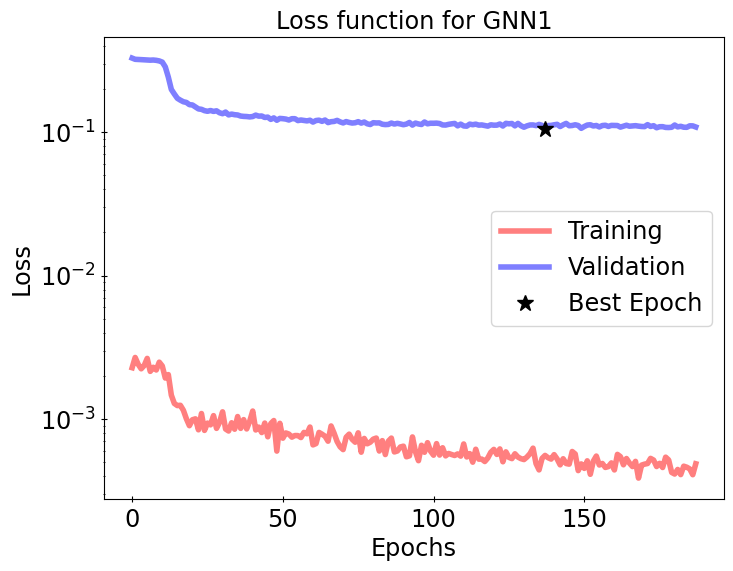

In [300]:

model_file = "model_GNN1.pt"

dict_loss = np.load(folder+"/loss_"+model_file + ".npy", allow_pickle=True).item()

fig = plt.figure(figsize=(8,6))
plt.semilogy(dict_loss["train"], linewidth=4, color="red", alpha=0.5, label="Training")
plt.semilogy(dict_loss["valid"], linewidth=4, color="blue", alpha=0.5, label="Validation")
plt.plot(np.argmin(dict_loss["valid"]), np.min(dict_loss["valid"]), 'k*', markersize=12, label="Best Epoch")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss function for GNN1")


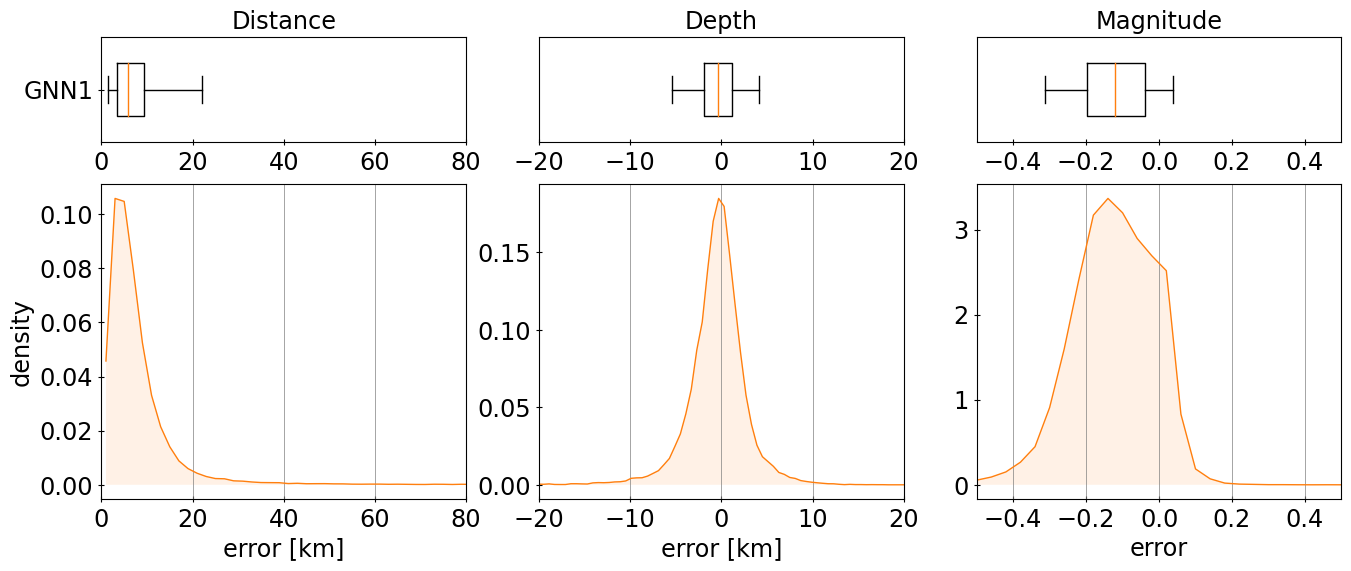

In [301]:

name = "../SCEDC/agreg-results/GNN1-DATA-select-0-0"
name_ref = "."

(results, labels, _) = pickle.load(open(name + "-all-test-results-mul.pkl", "rb"))
if name_ref != ".":
    (results_ref, labels_ref, _) = pickle.load(open(name_ref + "-all-test-results.pkl", "rb"))

fig, axs = plt.subplots(2, 3, figsize=(16, 6), gridspec_kw={'height_ratios':[1,3]})
titles = ("Distance", "Depth", "Magnitude")
err_ranges = ((0, 200), (-30, 30), (-2.0, 2.0))

def plot_density(i, results, labels, l, pos):

    ax = axs[1,i]

    if i == 0:
        lat = results[:, 0] * np.pi/180
        lat_lab = labels[:, 0] * np.pi/180
        lon = results[:, 1] * np.pi/180
        lon_lab = labels[:, 1] * np.pi/180
        test_diff = 6371 * np.arccos(np.sin(lat)*np.sin(lat_lab)+np.cos(lat)*np.cos(lat_lab)*np.cos(lon-lon_lab))
    else:
        test_diff = results[:, i+1] - labels[:, i+1]
    
    test_hist, test_bins = np.histogram(test_diff, bins=100, range=err_ranges[i], density=True)
    test_bins = 0.5 * (test_bins[1:] + test_bins[:-1])

    ax.plot(test_bins, test_hist, c="C"+str(pos), lw=1., alpha=1, label=l)
    ax.fill_between(test_bins, 0, test_hist, fc="C"+str(pos), alpha=0.1)

    ax = axs[0,i]

    ax.boxplot(test_diff, sym="", vert=False, whis=[5,95], positions=[pos], widths = 0.5, labels=[l])
    if i != 0:
        ax.set_yticks([])

axs[1,0].set_xlabel("error [km]")
axs[1,1].set_xlabel("error [km]")
axs[1,2].set_xlabel("error")
axs[1,0].set_ylabel("density")

for j in range(2):
    axs[j,0].set_xlim(0.0, 80.0)
    axs[j,1].set_xlim(-20.0, 20.0)
    axs[j,2].set_xlim(-0.5, 0.5)

absvlines = [[0, 20, 40, 60, 80], [-20, -10, 0, 10, 20], [-0.4, -0.2, 0.0, 0.2, 0.4]]


for i in range(3):
    
    for a in absvlines[i]:
        axs[1,i].axvline(a, c="grey", lw = 0.5)

    if name_ref != ".":
        plot_density(i, results_ref, labels_ref, name_ref, 0)
    plot_density(i, results, labels, "GNN1", 1)
#    axs[1,i].legend()

    axs[0,i].invert_yaxis()
    axs[0,i].set_title(titles[i])


plt.savefig(name + "-density.jpeg")





### Limitations (In Progress)

### Second architecture : Spectral Graph Neural Network GNN2


<img src="./images/GraphConvLayer.png" alt="" />

In this second architecture, we keep the first and last components of GNN1, but this time, we do take advantage of the graph structure of the data by replacing the second component $h^{(2)}_{\theta^{(2)}}$ with a message passing neural networks with a modified update rule such as:

$$ \hat{x_s} = \sigma \Big( x_s W + \sum_{v_j \in {\mathbb{N}_{geo}(v_s)}} \frac{1}{\sqrt{d_s d_j}}x_j W \Big) $$

Using a fixed spatial graph G computed with the stations as nodes and the euclidean distance based on the geographical coordinates of the station as the edges. For each station $v_s$, we compute a neighborhood $\mathbb{N}_{geo}(v_s)$ which are composed of the $k=4$-nearest neighbors in the graph.


<span style="color:red">Work in progress : Image of the graph </span>


<span style="color:red">**Work in progress : 
Image of the graph and the k nearest neighbours of a station **</span>



In [ ]:
 
        
class GraphConvLayer(nn.Module):

    def __init__(self, in_channels, out_channels, adj, activ = F.relu, dropout = 0):
        """
        :param in_channels: Number of input features at each node in each time step.
        :param out_channels: Desired number of output features at each node in each time step.
        :param adj: Normalized adjacency matrix.
        """
        super(GraphConvLayer, self).__init__()

        adj_sym = (adj+torch.t(adj))/2
        D = torch.sum(adj_sym, dim=1).reshape((-1,))
        diag = torch.diag(torch.rsqrt(D))
        norm_adj = torch.matmul(diag, torch.matmul(adj_sym, diag))

        self.adj = norm_adj 
        self.Theta = nn.Parameter(torch.FloatTensor(in_channels, out_channels))
        self.activ = activ
        self.dropout = nn.Dropout2d(dropout)

        nn.init.orthogonal_(self.Theta)
            

    def forward(self, X):
        """
        :param X: Input data of shape (batch_size, num_features=in_channels, num_nodes, num_timesteps)
        :return: Output data of shape (batch_size, num_features=out_channels, num_nodes, num_timesteps)
        """
        
        lfs = torch.einsum("ij,kmjl->kmil", [self.adj, X])
        X = torch.einsum("kmil,mn->knil", [lfs, self.Theta])
        X = self.activ(X)
        X = self.dropout(X)
        return X
   

In this case, we rely on a fixed graph computed using the euclidean distance between the spatial coordinates of the stations. For each of those stations, a spatio-temporal enhanced feature vector is computed using the temporal features vector of the CNN component and concatenating it directly with the geographic coordinates of the stations.

<img src="./images/GNN2.png" alt="" />

In [ ]:

class GNN2(nn.Module):

    def __init__(self, in_channels, adj, pos, dropout = 0):
        """
        :param in_channels: Number of input features at each node in each time step.
        :param adj: Normalized adjacency matrix.
        :param pos: Positions of stations : shape (2, num_nodes)
        """
        
        super(GNN2, self).__init__()
        
        self.pos = pos
        
        self.CNNlayer = CNN(in_channels = in_channels, dropout = dropout)
        self.layers = nn.ModuleList()
        self.layers.append(GraphConvLayer(in_channels = 66, out_channels = 128, adj = adj, activ = F.relu, dropout = dropout))
        self.layers.append(GraphConvLayer(in_channels = 128, out_channels = 128, adj = adj, activ = F.relu, dropout = dropout))
        self.layers.append(MLP(num_nodes = pos.shape[1], in_channels = 128, dropout = dropout))
        

    def forward(self, X):
        """
        :param X: Input data of shape (batch_size, num_features=in_channels, num_nodes, 2048)
        :return: Output data of shape (batch_size, num_features=4)
        """
        
        X = self.CNNlayer(X)                                                    # Shape (batch_size, 64, num_nodes, 1)
        pos = self.pos.repeat(X.shape[0], 1, 1, 1).permute(0, 2, 3, 1)          # Shape (batch_size, 2, num_nodes, 1)
        X = torch.cat((X, pos), 1)                                              # Shape (batch_size, 66, num_nodes, 1)
        
        for l in self.layers:
            X = l(X)
            
        return X


In [ ]:
model = md.GNN2(x_train.shape[1], adj, pos, dropout_rate).to(device)
print('Total params: ' + str(sum(p.numel() for p in model.parameters())))
summary(model, [1, 1, 42, 2048])


In [296]:
torch.cuda.empty_cache()
gc.collect()

#               x_train             y_train
# Dimension 0 : évènements          évènements
# Dimension 1 : directions (3)      labels (4)
# Dimension 2 : stations (50)       -
# Dimension 3 : temps (2048)    

x_train, y_train = arrData[0][0], arrData[0][1]
for data_file in train_file[1:]:
    x_train = np.concatenate((x_train, arrData[0][0]), axis = 0)
    y_train = np.concatenate((y_train, arrData[0][1]), axis = 0)

x_train = torch.permute(torch.Tensor(x_train).to(device),(0,3,1,2))
y_train = torch.Tensor(y_train[:,1:]).to(device)
pos = torch.Tensor(arrData[0][2].T).to(device)
dist = torch.Tensor(arrData[0][3]).to(device)

(x_valid, y_valid, _, _) = np.load(valid_file, allow_pickle=True)
x_valid = torch.permute(torch.Tensor(x_valid).to(device),(0,3,1,2))
y_valid = torch.Tensor(y_valid[:,1:]).to(device)


knn = torch.topk(dist, K, largest=False)[1].cpu().detach().numpy()
adj = np.zeros((len(dist), len(dist)))
for i, row in enumerate(knn):
    for j in row:
        adj[i, j] = 1
adj = torch.Tensor(adj).to(device)

model =  md.GNN2(x_train.shape[1], adj, pos, dropout_rate).to(device)

model_file = "model_GNN2.pt"
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
if L2:
    criterion = nn.MSELoss().to(device)
else:
    criterion = nn.L1Loss().to(device)
    
loss_dict = {"train" : [],
            "valid" : []}
loss_valid_min = 0


earlyStopper = EarlyStopper(50, 0.0002)
for epoch in tqdm(range(n_epochs)):
    
    t1 = timeit.default_timer()
    inds = np.arange(len(x_train))
    np.random.shuffle(inds)
    
    lossAvg = 0
    count = 0
    
    for k in range(0, len(x_train)-batch_size, batch_size):
        inds_k = inds[k:k+batch_size]
        results = model(x_train[inds_k])
        loss = criterion(results,y_train[inds_k])

#        print(loss.item(),k,epoch,time()-t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossAvg = loss.item()
        count +=1
        
    lossAvg = lossAvg / count
    loss_dict["train"].append(lossAvg)

    # Early stopping
    with torch.no_grad():
        results_valid = model(x_valid)
    loss_valid = criterion(results_valid, y_valid)
    #print(loss_valid.item(), epoch, time()-t)
    if loss_valid_min == 0 or loss_valid_min > loss_valid.item():
        loss_valid_min = loss_valid.item()
        model_valid = model.state_dict()
    loss_dict["valid"].append(loss_valid.item())
    
    if earlyStopper.early_stop(loss_valid.item()):
        print(f'Epoch {epoch+1}/{n_epochs}: {t2-t1:.2f}s - Training loss = {lossAvg:.6f} - Validation loss = {loss_valid.item():.6f}')
        break
    
    t2 = timeit.default_timer()
    print(f'Epoch {epoch+1}/{n_epochs}: {t2-t1:.2f}s - Training loss = {lossAvg:.6f} - Validation loss = {loss_valid.item():.6f}')


torch.save(model_valid, folder+"/"+model_file)
np.save(folder+"/loss_"+model_file, loss_dict)
print(loss_valid_min)

  0%|          | 1/800 [00:11<2:38:27, 11.90s/it]

Epoch 1/800: 11.90s - Training loss = 0.002491 - Validation loss = 0.326330


  0%|          | 2/800 [00:23<2:39:01, 11.96s/it]

Epoch 2/800: 12.00s - Training loss = 0.002483 - Validation loss = 0.321067


  0%|          | 3/800 [00:36<2:39:44, 12.03s/it]

Epoch 3/800: 12.11s - Training loss = 0.002403 - Validation loss = 0.321012


  0%|          | 4/800 [00:48<2:40:28, 12.10s/it]

Epoch 4/800: 12.20s - Training loss = 0.001943 - Validation loss = 0.315816


  1%|          | 5/800 [01:00<2:41:31, 12.19s/it]

Epoch 5/800: 12.35s - Training loss = 0.001902 - Validation loss = 0.283218


  1%|          | 6/800 [01:12<2:40:30, 12.13s/it]

Epoch 6/800: 12.01s - Training loss = 0.001635 - Validation loss = 0.230445


  1%|          | 7/800 [01:24<2:40:11, 12.12s/it]

Epoch 7/800: 12.10s - Training loss = 0.001395 - Validation loss = 0.196018


  1%|          | 8/800 [01:36<2:38:29, 12.01s/it]

Epoch 8/800: 11.76s - Training loss = 0.001523 - Validation loss = 0.182420


  1%|          | 9/800 [01:47<2:36:18, 11.86s/it]

Epoch 9/800: 11.52s - Training loss = 0.001430 - Validation loss = 0.171273


  1%|▏         | 10/800 [01:59<2:34:55, 11.77s/it]

Epoch 10/800: 11.57s - Training loss = 0.001283 - Validation loss = 0.163952


  1%|▏         | 11/800 [02:11<2:34:00, 11.71s/it]

Epoch 11/800: 11.59s - Training loss = 0.001205 - Validation loss = 0.160631


  2%|▏         | 12/800 [02:22<2:33:21, 11.68s/it]

Epoch 12/800: 11.60s - Training loss = 0.001313 - Validation loss = 0.159203


  2%|▏         | 13/800 [02:34<2:32:33, 11.63s/it]

Epoch 13/800: 11.52s - Training loss = 0.001173 - Validation loss = 0.154130


  2%|▏         | 14/800 [02:45<2:31:57, 11.60s/it]

Epoch 14/800: 11.53s - Training loss = 0.001052 - Validation loss = 0.153641


  2%|▏         | 15/800 [02:57<2:31:33, 11.58s/it]

Epoch 15/800: 11.55s - Training loss = 0.001069 - Validation loss = 0.146737


  2%|▏         | 16/800 [03:08<2:31:12, 11.57s/it]

Epoch 16/800: 11.54s - Training loss = 0.001035 - Validation loss = 0.143377


  2%|▏         | 17/800 [03:20<2:30:53, 11.56s/it]

Epoch 17/800: 11.54s - Training loss = 0.000970 - Validation loss = 0.142267


  2%|▏         | 18/800 [03:31<2:30:36, 11.56s/it]

Epoch 18/800: 11.54s - Training loss = 0.000980 - Validation loss = 0.141349


  2%|▏         | 19/800 [03:43<2:30:19, 11.55s/it]

Epoch 19/800: 11.53s - Training loss = 0.000950 - Validation loss = 0.137464


  2%|▎         | 20/800 [03:54<2:30:01, 11.54s/it]

Epoch 20/800: 11.52s - Training loss = 0.000940 - Validation loss = 0.136124


  3%|▎         | 21/800 [04:06<2:29:47, 11.54s/it]

Epoch 21/800: 11.53s - Training loss = 0.000956 - Validation loss = 0.136472


  3%|▎         | 22/800 [04:18<2:29:34, 11.53s/it]

Epoch 22/800: 11.53s - Training loss = 0.000814 - Validation loss = 0.136363


  3%|▎         | 23/800 [04:29<2:29:19, 11.53s/it]

Epoch 23/800: 11.52s - Training loss = 0.000924 - Validation loss = 0.134033


  3%|▎         | 24/800 [04:41<2:29:06, 11.53s/it]

Epoch 24/800: 11.52s - Training loss = 0.000924 - Validation loss = 0.132974


  3%|▎         | 25/800 [04:52<2:28:57, 11.53s/it]

Epoch 25/800: 11.54s - Training loss = 0.001112 - Validation loss = 0.132349


  3%|▎         | 26/800 [05:04<2:29:29, 11.59s/it]

Epoch 26/800: 11.72s - Training loss = 0.000850 - Validation loss = 0.132263


  3%|▎         | 27/800 [05:15<2:29:19, 11.59s/it]

Epoch 27/800: 11.60s - Training loss = 0.000878 - Validation loss = 0.127743


  4%|▎         | 28/800 [05:27<2:29:15, 11.60s/it]

Epoch 28/800: 11.62s - Training loss = 0.000905 - Validation loss = 0.132239


  4%|▎         | 29/800 [05:39<2:29:35, 11.64s/it]

Epoch 29/800: 11.74s - Training loss = 0.000806 - Validation loss = 0.130226


  4%|▍         | 30/800 [05:51<2:29:48, 11.67s/it]

Epoch 30/800: 11.75s - Training loss = 0.000943 - Validation loss = 0.127278


  4%|▍         | 31/800 [06:02<2:30:17, 11.73s/it]

Epoch 31/800: 11.85s - Training loss = 0.000846 - Validation loss = 0.126107


  4%|▍         | 32/800 [06:15<2:31:30, 11.84s/it]

Epoch 32/800: 12.09s - Training loss = 0.000739 - Validation loss = 0.127523


  4%|▍         | 33/800 [06:26<2:31:03, 11.82s/it]

Epoch 33/800: 11.77s - Training loss = 0.000764 - Validation loss = 0.126901


  4%|▍         | 34/800 [06:38<2:31:06, 11.84s/it]

Epoch 34/800: 11.88s - Training loss = 0.000904 - Validation loss = 0.125926


  4%|▍         | 35/800 [06:50<2:31:13, 11.86s/it]

Epoch 35/800: 11.92s - Training loss = 0.000924 - Validation loss = 0.130825


  4%|▍         | 36/800 [07:02<2:32:46, 12.00s/it]

Epoch 36/800: 12.32s - Training loss = 0.000754 - Validation loss = 0.125102


  5%|▍         | 37/800 [07:15<2:33:59, 12.11s/it]

Epoch 37/800: 12.37s - Training loss = 0.000698 - Validation loss = 0.125184


  5%|▍         | 38/800 [07:27<2:33:42, 12.10s/it]

Epoch 38/800: 12.09s - Training loss = 0.000824 - Validation loss = 0.127375


  5%|▍         | 39/800 [07:38<2:31:32, 11.95s/it]

Epoch 39/800: 11.58s - Training loss = 0.000710 - Validation loss = 0.124420


  5%|▌         | 40/800 [07:50<2:29:40, 11.82s/it]

Epoch 40/800: 11.51s - Training loss = 0.000805 - Validation loss = 0.123184


  5%|▌         | 41/800 [08:01<2:28:21, 11.73s/it]

Epoch 41/800: 11.52s - Training loss = 0.000746 - Validation loss = 0.122323


  5%|▌         | 42/800 [08:13<2:27:58, 11.71s/it]

Epoch 42/800: 11.68s - Training loss = 0.000787 - Validation loss = 0.123308


  5%|▌         | 43/800 [08:25<2:27:04, 11.66s/it]

Epoch 43/800: 11.53s - Training loss = 0.000793 - Validation loss = 0.120818


  6%|▌         | 44/800 [08:36<2:26:22, 11.62s/it]

Epoch 44/800: 11.52s - Training loss = 0.000763 - Validation loss = 0.124086


  6%|▌         | 45/800 [08:48<2:25:50, 11.59s/it]

Epoch 45/800: 11.53s - Training loss = 0.000688 - Validation loss = 0.119644


  6%|▌         | 46/800 [08:59<2:25:24, 11.57s/it]

Epoch 46/800: 11.52s - Training loss = 0.000714 - Validation loss = 0.121295


  6%|▌         | 47/800 [09:11<2:25:01, 11.56s/it]

Epoch 47/800: 11.52s - Training loss = 0.000747 - Validation loss = 0.121994


  6%|▌         | 48/800 [09:22<2:24:39, 11.54s/it]

Epoch 48/800: 11.51s - Training loss = 0.000632 - Validation loss = 0.123740


  6%|▌         | 49/800 [09:34<2:24:22, 11.53s/it]

Epoch 49/800: 11.52s - Training loss = 0.000971 - Validation loss = 0.121698


  6%|▋         | 50/800 [09:45<2:24:06, 11.53s/it]

Epoch 50/800: 11.51s - Training loss = 0.000628 - Validation loss = 0.121876


  6%|▋         | 51/800 [09:57<2:23:55, 11.53s/it]

Epoch 51/800: 11.53s - Training loss = 0.000683 - Validation loss = 0.120882


  6%|▋         | 52/800 [10:08<2:23:43, 11.53s/it]

Epoch 52/800: 11.53s - Training loss = 0.000726 - Validation loss = 0.119670


  7%|▋         | 53/800 [10:20<2:23:28, 11.52s/it]

Epoch 53/800: 11.51s - Training loss = 0.000798 - Validation loss = 0.116607


  7%|▋         | 54/800 [10:31<2:23:20, 11.53s/it]

Epoch 54/800: 11.54s - Training loss = 0.000680 - Validation loss = 0.119432


  7%|▋         | 55/800 [10:43<2:24:12, 11.61s/it]

Epoch 55/800: 11.81s - Training loss = 0.000687 - Validation loss = 0.117253


  7%|▋         | 56/800 [10:55<2:24:23, 11.64s/it]

Epoch 56/800: 11.72s - Training loss = 0.000789 - Validation loss = 0.115818


  7%|▋         | 57/800 [11:07<2:24:29, 11.67s/it]

Epoch 57/800: 11.72s - Training loss = 0.000837 - Validation loss = 0.118509


  7%|▋         | 58/800 [11:18<2:24:26, 11.68s/it]

Epoch 58/800: 11.70s - Training loss = 0.000689 - Validation loss = 0.116409


  7%|▋         | 59/800 [11:30<2:24:31, 11.70s/it]

Epoch 59/800: 11.75s - Training loss = 0.000633 - Validation loss = 0.117828


  8%|▊         | 60/800 [11:42<2:24:31, 11.72s/it]

Epoch 60/800: 11.76s - Training loss = 0.000624 - Validation loss = 0.118608


  8%|▊         | 61/800 [11:54<2:24:55, 11.77s/it]

Epoch 61/800: 11.88s - Training loss = 0.000592 - Validation loss = 0.119816


  8%|▊         | 62/800 [12:06<2:25:54, 11.86s/it]

Epoch 62/800: 12.08s - Training loss = 0.000614 - Validation loss = 0.117679


  8%|▊         | 63/800 [12:18<2:26:31, 11.93s/it]

Epoch 63/800: 12.08s - Training loss = 0.000815 - Validation loss = 0.114469


  8%|▊         | 64/800 [12:30<2:26:48, 11.97s/it]

Epoch 64/800: 12.06s - Training loss = 0.000620 - Validation loss = 0.116174


  8%|▊         | 65/800 [12:42<2:27:05, 12.01s/it]

Epoch 65/800: 12.10s - Training loss = 0.000656 - Validation loss = 0.117796


  8%|▊         | 66/800 [12:54<2:27:32, 12.06s/it]

Epoch 66/800: 12.18s - Training loss = 0.000789 - Validation loss = 0.114138


  8%|▊         | 67/800 [13:06<2:27:15, 12.05s/it]

Epoch 67/800: 12.04s - Training loss = 0.000605 - Validation loss = 0.115824


  8%|▊         | 68/800 [13:18<2:27:02, 12.05s/it]

Epoch 68/800: 12.05s - Training loss = 0.000670 - Validation loss = 0.115254


  9%|▊         | 69/800 [13:30<2:27:04, 12.07s/it]

Epoch 69/800: 12.12s - Training loss = 0.000589 - Validation loss = 0.116769


  9%|▉         | 70/800 [13:43<2:27:19, 12.11s/it]

Epoch 70/800: 12.20s - Training loss = 0.000666 - Validation loss = 0.117447


  9%|▉         | 71/800 [13:55<2:27:25, 12.13s/it]

Epoch 71/800: 12.19s - Training loss = 0.000733 - Validation loss = 0.114831


  9%|▉         | 72/800 [14:07<2:27:25, 12.15s/it]

Epoch 72/800: 12.19s - Training loss = 0.000662 - Validation loss = 0.112691


  9%|▉         | 73/800 [14:19<2:27:10, 12.15s/it]

Epoch 73/800: 12.13s - Training loss = 0.000687 - Validation loss = 0.117354


  9%|▉         | 74/800 [14:31<2:27:08, 12.16s/it]

Epoch 74/800: 12.19s - Training loss = 0.000631 - Validation loss = 0.116486


  9%|▉         | 75/800 [14:44<2:28:13, 12.27s/it]

Epoch 75/800: 12.52s - Training loss = 0.000627 - Validation loss = 0.113761


 10%|▉         | 76/800 [14:57<2:29:57, 12.43s/it]

Epoch 76/800: 12.80s - Training loss = 0.000623 - Validation loss = 0.113636


 10%|▉         | 77/800 [15:09<2:29:49, 12.43s/it]

Epoch 77/800: 12.44s - Training loss = 0.000664 - Validation loss = 0.114919


 10%|▉         | 78/800 [15:22<2:30:08, 12.48s/it]

Epoch 78/800: 12.58s - Training loss = 0.000624 - Validation loss = 0.114757


 10%|▉         | 79/800 [15:34<2:29:47, 12.47s/it]

Epoch 79/800: 12.44s - Training loss = 0.000701 - Validation loss = 0.115629


 10%|█         | 80/800 [15:47<2:29:36, 12.47s/it]

Epoch 80/800: 12.47s - Training loss = 0.000588 - Validation loss = 0.113908


 10%|█         | 81/800 [15:59<2:30:22, 12.55s/it]

Epoch 81/800: 12.74s - Training loss = 0.000658 - Validation loss = 0.114271


 10%|█         | 82/800 [16:12<2:30:14, 12.56s/it]

Epoch 82/800: 12.57s - Training loss = 0.000641 - Validation loss = 0.116148


 10%|█         | 83/800 [16:24<2:29:42, 12.53s/it]

Epoch 83/800: 12.46s - Training loss = 0.000646 - Validation loss = 0.113250


 10%|█         | 84/800 [16:37<2:29:33, 12.53s/it]

Epoch 84/800: 12.54s - Training loss = 0.000546 - Validation loss = 0.112646


 11%|█         | 85/800 [16:49<2:28:48, 12.49s/it]

Epoch 85/800: 12.38s - Training loss = 0.000651 - Validation loss = 0.112896


 11%|█         | 86/800 [17:02<2:28:37, 12.49s/it]

Epoch 86/800: 12.49s - Training loss = 0.000486 - Validation loss = 0.117309


 11%|█         | 87/800 [17:14<2:27:58, 12.45s/it]

Epoch 87/800: 12.36s - Training loss = 0.000580 - Validation loss = 0.112809


 11%|█         | 88/800 [17:27<2:27:47, 12.45s/it]

Epoch 88/800: 12.46s - Training loss = 0.000657 - Validation loss = 0.117302


 11%|█         | 89/800 [17:39<2:28:06, 12.50s/it]

Epoch 89/800: 12.60s - Training loss = 0.000578 - Validation loss = 0.114474


 11%|█▏        | 90/800 [17:52<2:28:21, 12.54s/it]

Epoch 90/800: 12.62s - Training loss = 0.000681 - Validation loss = 0.113605


 11%|█▏        | 91/800 [18:04<2:27:39, 12.50s/it]

Epoch 91/800: 12.40s - Training loss = 0.000607 - Validation loss = 0.113444


 12%|█▏        | 92/800 [18:17<2:27:18, 12.48s/it]

Epoch 92/800: 12.46s - Training loss = 0.000585 - Validation loss = 0.112188


 12%|█▏        | 93/800 [18:29<2:27:11, 12.49s/it]

Epoch 93/800: 12.51s - Training loss = 0.000651 - Validation loss = 0.114891


 12%|█▏        | 94/800 [18:42<2:26:42, 12.47s/it]

Epoch 94/800: 12.41s - Training loss = 0.000578 - Validation loss = 0.111869


 12%|█▏        | 95/800 [18:54<2:26:32, 12.47s/it]

Epoch 95/800: 12.48s - Training loss = 0.000627 - Validation loss = 0.112332


 12%|█▏        | 96/800 [19:07<2:26:22, 12.48s/it]

Epoch 96/800: 12.48s - Training loss = 0.000511 - Validation loss = 0.115686


 12%|█▏        | 97/800 [19:19<2:26:03, 12.47s/it]

Epoch 97/800: 12.44s - Training loss = 0.000554 - Validation loss = 0.111571


 12%|█▏        | 98/800 [19:32<2:26:17, 12.50s/it]

Epoch 98/800: 12.59s - Training loss = 0.000586 - Validation loss = 0.113306


 12%|█▏        | 99/800 [19:44<2:25:36, 12.46s/it]

Epoch 99/800: 12.37s - Training loss = 0.000628 - Validation loss = 0.110325


 12%|█▎        | 100/800 [19:56<2:25:06, 12.44s/it]

Epoch 100/800: 12.38s - Training loss = 0.000499 - Validation loss = 0.113159


 13%|█▎        | 101/800 [20:09<2:24:47, 12.43s/it]

Epoch 101/800: 12.41s - Training loss = 0.000574 - Validation loss = 0.111618


 13%|█▎        | 102/800 [20:21<2:24:45, 12.44s/it]

Epoch 102/800: 12.48s - Training loss = 0.000581 - Validation loss = 0.111172


 13%|█▎        | 103/800 [20:34<2:25:14, 12.50s/it]

Epoch 103/800: 12.64s - Training loss = 0.000489 - Validation loss = 0.115463


 13%|█▎        | 104/800 [20:46<2:24:59, 12.50s/it]

Epoch 104/800: 12.49s - Training loss = 0.000562 - Validation loss = 0.112329


 13%|█▎        | 105/800 [20:59<2:24:40, 12.49s/it]

Epoch 105/800: 12.47s - Training loss = 0.000561 - Validation loss = 0.117220


 13%|█▎        | 106/800 [21:11<2:24:32, 12.50s/it]

Epoch 106/800: 12.51s - Training loss = 0.000560 - Validation loss = 0.112510


 13%|█▎        | 107/800 [21:24<2:24:21, 12.50s/it]

Epoch 107/800: 12.50s - Training loss = 0.000700 - Validation loss = 0.114823


 14%|█▎        | 108/800 [21:36<2:21:45, 12.29s/it]

Epoch 108/800: 11.81s - Training loss = 0.000561 - Validation loss = 0.115172


 14%|█▎        | 109/800 [21:48<2:20:08, 12.17s/it]

Epoch 109/800: 11.88s - Training loss = 0.000495 - Validation loss = 0.112131


 14%|█▍        | 110/800 [22:00<2:19:53, 12.16s/it]

Epoch 110/800: 12.16s - Training loss = 0.000594 - Validation loss = 0.111474


 14%|█▍        | 111/800 [22:12<2:19:44, 12.17s/it]

Epoch 111/800: 12.18s - Training loss = 0.000492 - Validation loss = 0.112437


 14%|█▍        | 112/800 [22:24<2:19:39, 12.18s/it]

Epoch 112/800: 12.20s - Training loss = 0.000590 - Validation loss = 0.112696


 14%|█▍        | 113/800 [22:36<2:19:31, 12.19s/it]

Epoch 113/800: 12.20s - Training loss = 0.000565 - Validation loss = 0.110608


 14%|█▍        | 114/800 [22:49<2:19:40, 12.22s/it]

Epoch 114/800: 12.29s - Training loss = 0.000512 - Validation loss = 0.111538


 14%|█▍        | 115/800 [23:01<2:19:53, 12.25s/it]

Epoch 115/800: 12.34s - Training loss = 0.000547 - Validation loss = 0.110172


 14%|█▍        | 116/800 [23:14<2:21:55, 12.45s/it]

Epoch 116/800: 12.90s - Training loss = 0.000566 - Validation loss = 0.109560


 15%|█▍        | 117/800 [23:27<2:22:34, 12.53s/it]

Epoch 117/800: 12.70s - Training loss = 0.000527 - Validation loss = 0.110670


 15%|█▍        | 118/800 [23:39<2:21:25, 12.44s/it]

Epoch 118/800: 12.25s - Training loss = 0.000581 - Validation loss = 0.112604


 15%|█▍        | 119/800 [23:51<2:20:39, 12.39s/it]

Epoch 119/800: 12.28s - Training loss = 0.000501 - Validation loss = 0.112579


 15%|█▌        | 120/800 [24:03<2:19:44, 12.33s/it]

Epoch 120/800: 12.18s - Training loss = 0.000534 - Validation loss = 0.109011


 15%|█▌        | 121/800 [24:16<2:19:07, 12.29s/it]

Epoch 121/800: 12.21s - Training loss = 0.000549 - Validation loss = 0.112876


 15%|█▌        | 122/800 [24:28<2:19:11, 12.32s/it]

Epoch 122/800: 12.37s - Training loss = 0.000485 - Validation loss = 0.109560


 15%|█▌        | 123/800 [24:40<2:18:34, 12.28s/it]

Epoch 123/800: 12.19s - Training loss = 0.000617 - Validation loss = 0.111794


 16%|█▌        | 124/800 [24:52<2:18:13, 12.27s/it]

Epoch 124/800: 12.24s - Training loss = 0.000602 - Validation loss = 0.112172


 16%|█▌        | 125/800 [25:05<2:17:45, 12.25s/it]

Epoch 125/800: 12.19s - Training loss = 0.000614 - Validation loss = 0.112804


 16%|█▌        | 126/800 [25:17<2:17:46, 12.27s/it]

Epoch 126/800: 12.31s - Training loss = 0.000615 - Validation loss = 0.113711


 16%|█▌        | 127/800 [25:29<2:17:26, 12.25s/it]

Epoch 127/800: 12.22s - Training loss = 0.000575 - Validation loss = 0.111714


 16%|█▌        | 128/800 [25:41<2:17:24, 12.27s/it]

Epoch 128/800: 12.31s - Training loss = 0.000433 - Validation loss = 0.108249


 16%|█▌        | 129/800 [25:54<2:17:41, 12.31s/it]

Epoch 129/800: 12.41s - Training loss = 0.000565 - Validation loss = 0.111278


 16%|█▋        | 130/800 [26:06<2:17:26, 12.31s/it]

Epoch 130/800: 12.30s - Training loss = 0.000560 - Validation loss = 0.113887


 16%|█▋        | 131/800 [26:18<2:16:58, 12.28s/it]

Epoch 131/800: 12.23s - Training loss = 0.000533 - Validation loss = 0.112320


 16%|█▋        | 132/800 [26:31<2:16:37, 12.27s/it]

Epoch 132/800: 12.24s - Training loss = 0.000512 - Validation loss = 0.110873


 17%|█▋        | 133/800 [26:43<2:16:20, 12.26s/it]

Epoch 133/800: 12.25s - Training loss = 0.000567 - Validation loss = 0.112222


 17%|█▋        | 134/800 [26:55<2:16:06, 12.26s/it]

Epoch 134/800: 12.25s - Training loss = 0.000467 - Validation loss = 0.111893


 17%|█▋        | 135/800 [27:07<2:15:54, 12.26s/it]

Epoch 135/800: 12.26s - Training loss = 0.000494 - Validation loss = 0.109198


 17%|█▋        | 136/800 [27:19<2:15:25, 12.24s/it]

Epoch 136/800: 12.18s - Training loss = 0.000555 - Validation loss = 0.112744


 17%|█▋        | 137/800 [27:32<2:15:10, 12.23s/it]

Epoch 137/800: 12.22s - Training loss = 0.000536 - Validation loss = 0.109608


 17%|█▋        | 138/800 [27:44<2:14:02, 12.15s/it]

Epoch 138/800: 11.95s - Training loss = 0.000500 - Validation loss = 0.110377


 17%|█▋        | 139/800 [27:56<2:13:49, 12.15s/it]

Epoch 139/800: 12.14s - Training loss = 0.000457 - Validation loss = 0.110527


 18%|█▊        | 140/800 [28:08<2:12:54, 12.08s/it]

Epoch 140/800: 11.93s - Training loss = 0.000466 - Validation loss = 0.112981


 18%|█▊        | 141/800 [28:20<2:12:13, 12.04s/it]

Epoch 141/800: 11.94s - Training loss = 0.000534 - Validation loss = 0.113190


 18%|█▊        | 142/800 [28:31<2:11:13, 11.97s/it]

Epoch 142/800: 11.79s - Training loss = 0.000475 - Validation loss = 0.107508


 18%|█▊        | 143/800 [28:43<2:11:00, 11.96s/it]

Epoch 143/800: 11.96s - Training loss = 0.000487 - Validation loss = 0.109696


 18%|█▊        | 144/800 [28:56<2:11:25, 12.02s/it]

Epoch 144/800: 12.15s - Training loss = 0.000503 - Validation loss = 0.109389


 18%|█▊        | 145/800 [29:08<2:11:41, 12.06s/it]

Epoch 145/800: 12.16s - Training loss = 0.000546 - Validation loss = 0.112090


 18%|█▊        | 146/800 [29:20<2:12:00, 12.11s/it]

Epoch 146/800: 12.22s - Training loss = 0.000530 - Validation loss = 0.107573


 18%|█▊        | 147/800 [29:32<2:12:01, 12.13s/it]

Epoch 147/800: 12.17s - Training loss = 0.000421 - Validation loss = 0.111178


 18%|█▊        | 148/800 [29:44<2:12:07, 12.16s/it]

Epoch 148/800: 12.22s - Training loss = 0.000473 - Validation loss = 0.109018


 19%|█▊        | 149/800 [29:57<2:12:18, 12.19s/it]

Epoch 149/800: 12.28s - Training loss = 0.000596 - Validation loss = 0.108168


 19%|█▉        | 150/800 [30:09<2:12:02, 12.19s/it]

Epoch 150/800: 12.17s - Training loss = 0.000472 - Validation loss = 0.109971


 19%|█▉        | 151/800 [30:21<2:11:45, 12.18s/it]

Epoch 151/800: 12.16s - Training loss = 0.000444 - Validation loss = 0.109041


 19%|█▉        | 152/800 [30:33<2:11:37, 12.19s/it]

Epoch 152/800: 12.20s - Training loss = 0.000506 - Validation loss = 0.111776


 19%|█▉        | 153/800 [30:45<2:11:21, 12.18s/it]

Epoch 153/800: 12.16s - Training loss = 0.000537 - Validation loss = 0.109716


 19%|█▉        | 154/800 [30:58<2:11:14, 12.19s/it]

Epoch 154/800: 12.21s - Training loss = 0.000642 - Validation loss = 0.109503


 19%|█▉        | 155/800 [31:10<2:11:03, 12.19s/it]

Epoch 155/800: 12.19s - Training loss = 0.000452 - Validation loss = 0.111603


 20%|█▉        | 156/800 [31:22<2:10:53, 12.19s/it]

Epoch 156/800: 12.20s - Training loss = 0.000490 - Validation loss = 0.109998


 20%|█▉        | 157/800 [31:34<2:10:47, 12.20s/it]

Epoch 157/800: 12.23s - Training loss = 0.000490 - Validation loss = 0.111195


 20%|█▉        | 158/800 [31:46<2:10:32, 12.20s/it]

Epoch 158/800: 12.19s - Training loss = 0.000434 - Validation loss = 0.108046


 20%|█▉        | 159/800 [31:59<2:10:17, 12.20s/it]

Epoch 159/800: 12.18s - Training loss = 0.000396 - Validation loss = 0.110268


 20%|██        | 160/800 [32:11<2:09:58, 12.19s/it]

Epoch 160/800: 12.16s - Training loss = 0.000404 - Validation loss = 0.113469


 20%|██        | 161/800 [32:23<2:09:34, 12.17s/it]

Epoch 161/800: 12.12s - Training loss = 0.000471 - Validation loss = 0.108136


 20%|██        | 162/800 [32:35<2:09:18, 12.16s/it]

Epoch 162/800: 12.15s - Training loss = 0.000465 - Validation loss = 0.110947


 20%|██        | 163/800 [32:47<2:09:30, 12.20s/it]

Epoch 163/800: 12.29s - Training loss = 0.000518 - Validation loss = 0.113648


 20%|██        | 164/800 [33:00<2:09:25, 12.21s/it]

Epoch 164/800: 12.24s - Training loss = 0.000413 - Validation loss = 0.109835


 21%|██        | 165/800 [33:12<2:09:17, 12.22s/it]

Epoch 165/800: 12.23s - Training loss = 0.000461 - Validation loss = 0.109713


 21%|██        | 166/800 [33:24<2:09:09, 12.22s/it]

Epoch 166/800: 12.24s - Training loss = 0.000557 - Validation loss = 0.112213


 21%|██        | 167/800 [33:36<2:09:11, 12.24s/it]

Epoch 167/800: 12.29s - Training loss = 0.000449 - Validation loss = 0.110936


 21%|██        | 168/800 [33:49<2:09:18, 12.28s/it]

Epoch 168/800: 12.35s - Training loss = 0.000466 - Validation loss = 0.110698


 21%|██        | 169/800 [34:01<2:09:08, 12.28s/it]

Epoch 169/800: 12.28s - Training loss = 0.000481 - Validation loss = 0.111618


 21%|██▏       | 170/800 [34:13<2:09:11, 12.30s/it]

Epoch 170/800: 12.36s - Training loss = 0.000500 - Validation loss = 0.107979


 21%|██▏       | 171/800 [34:26<2:08:49, 12.29s/it]

Epoch 171/800: 12.25s - Training loss = 0.000477 - Validation loss = 0.108951


 22%|██▏       | 172/800 [34:38<2:08:51, 12.31s/it]

Epoch 172/800: 12.36s - Training loss = 0.000443 - Validation loss = 0.108777


 22%|██▏       | 173/800 [34:50<2:08:15, 12.27s/it]

Epoch 173/800: 12.18s - Training loss = 0.000573 - Validation loss = 0.108726


 22%|██▏       | 174/800 [35:02<2:07:36, 12.23s/it]

Epoch 174/800: 12.13s - Training loss = 0.000467 - Validation loss = 0.108885


 22%|██▏       | 175/800 [35:14<2:07:15, 12.22s/it]

Epoch 175/800: 12.18s - Training loss = 0.000500 - Validation loss = 0.109629


 22%|██▏       | 176/800 [35:27<2:06:56, 12.21s/it]

Epoch 176/800: 12.18s - Training loss = 0.000433 - Validation loss = 0.109235


 22%|██▏       | 177/800 [35:39<2:06:35, 12.19s/it]

Epoch 177/800: 12.16s - Training loss = 0.000569 - Validation loss = 0.112974


 22%|██▏       | 178/800 [35:51<2:06:11, 12.17s/it]

Epoch 178/800: 12.12s - Training loss = 0.000486 - Validation loss = 0.109925


 22%|██▏       | 179/800 [36:03<2:05:56, 12.17s/it]

Epoch 179/800: 12.16s - Training loss = 0.000465 - Validation loss = 0.110412


 22%|██▎       | 180/800 [36:15<2:05:33, 12.15s/it]

Epoch 180/800: 12.11s - Training loss = 0.000470 - Validation loss = 0.111986


 23%|██▎       | 181/800 [36:27<2:05:20, 12.15s/it]

Epoch 181/800: 12.15s - Training loss = 0.000421 - Validation loss = 0.109908


 23%|██▎       | 182/800 [36:39<2:05:13, 12.16s/it]

Epoch 182/800: 12.18s - Training loss = 0.000461 - Validation loss = 0.109513


 23%|██▎       | 183/800 [36:52<2:05:11, 12.17s/it]

Epoch 183/800: 12.21s - Training loss = 0.000428 - Validation loss = 0.107922


 23%|██▎       | 184/800 [37:04<2:05:01, 12.18s/it]

Epoch 184/800: 12.19s - Training loss = 0.000441 - Validation loss = 0.110676


 23%|██▎       | 185/800 [37:16<2:04:54, 12.19s/it]

Epoch 185/800: 12.20s - Training loss = 0.000573 - Validation loss = 0.109637


 23%|██▎       | 186/800 [37:28<2:04:46, 12.19s/it]

Epoch 186/800: 12.21s - Training loss = 0.000488 - Validation loss = 0.110333


 23%|██▎       | 187/800 [37:41<2:04:42, 12.21s/it]

Epoch 187/800: 12.24s - Training loss = 0.000483 - Validation loss = 0.113289


 24%|██▎       | 188/800 [37:53<2:04:23, 12.20s/it]

Epoch 188/800: 12.17s - Training loss = 0.000494 - Validation loss = 0.108066


 24%|██▎       | 189/800 [38:05<2:03:52, 12.17s/it]

Epoch 189/800: 12.09s - Training loss = 0.000490 - Validation loss = 0.110120


 24%|██▍       | 190/800 [38:17<2:03:43, 12.17s/it]

Epoch 190/800: 12.18s - Training loss = 0.000421 - Validation loss = 0.108185


 24%|██▍       | 191/800 [38:29<2:03:32, 12.17s/it]

Epoch 191/800: 12.18s - Training loss = 0.000532 - Validation loss = 0.113115


 24%|██▍       | 192/800 [38:41<2:03:24, 12.18s/it]

Epoch 192/800: 12.19s - Training loss = 0.000437 - Validation loss = 0.109637


 24%|██▍       | 192/800 [38:54<2:03:11, 12.16s/it]

Epoch 193/800: -0.00s - Training loss = 0.000481 - Validation loss = 0.107995


TypeError: expected str, bytes or os.PathLike object, not dict

### Plotting the results

Text(0.5, 1.0, 'Loss function for GNN2')

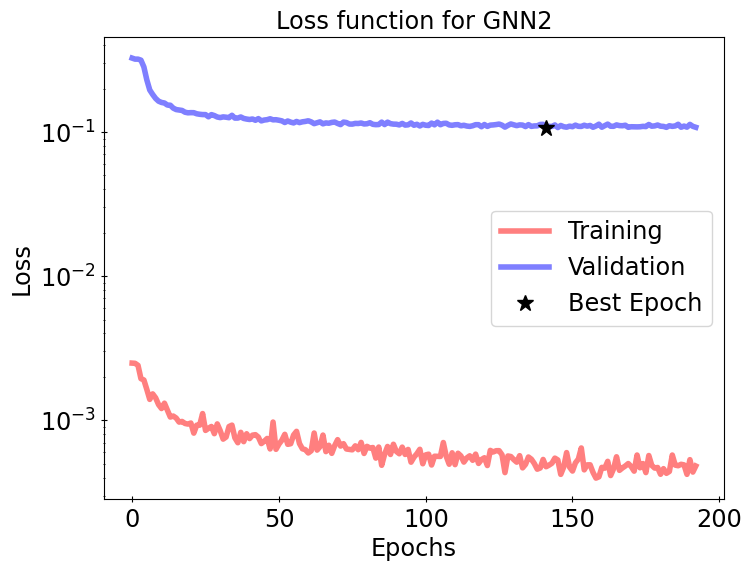

In [302]:

model_file = "model_GNN2.pt"

dict_loss = np.load(folder+"/loss_"+model_file + ".npy", allow_pickle=True).item()

fig = plt.figure(figsize=(8,6))
plt.semilogy(dict_loss["train"], linewidth=4, color="red", alpha=0.5, label="Training")
plt.semilogy(dict_loss["valid"], linewidth=4, color="blue", alpha=0.5, label="Validation")
plt.plot(np.argmin(dict_loss["valid"]), np.min(dict_loss["valid"]), 'k*', markersize=12, label="Best Epoch")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss function for GNN2")


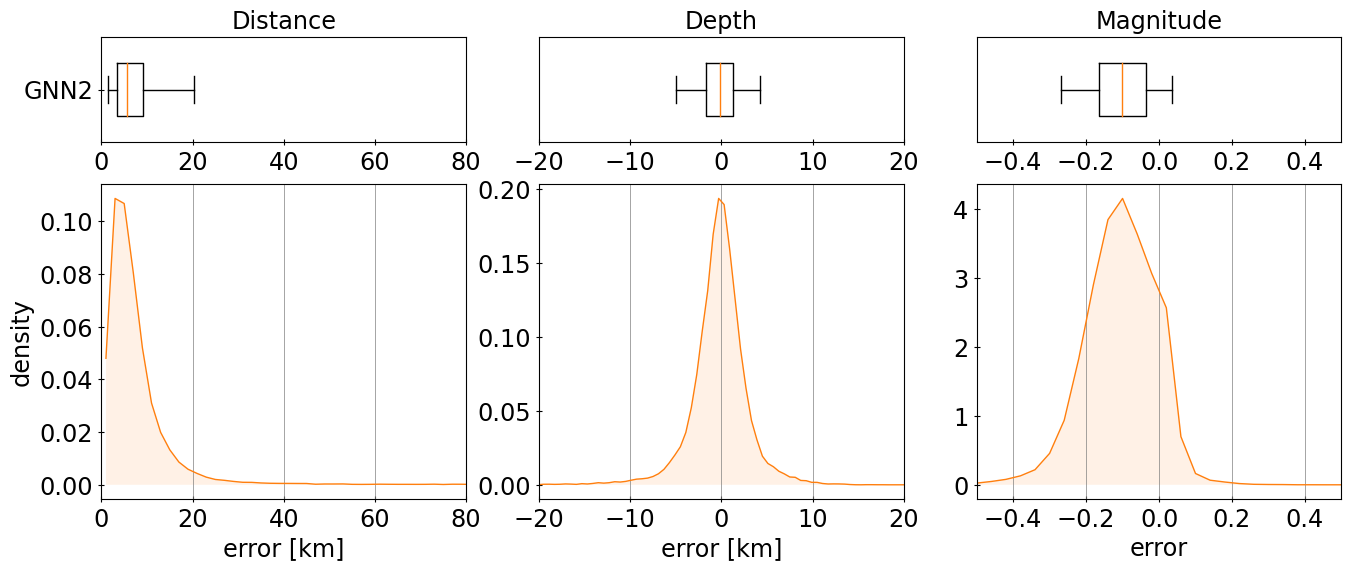

In [303]:

name = "../SCEDC/agreg-results/GNN2-DATA-select-0-0"
name_ref = "."

(results, labels, _) = pickle.load(open(name + "-all-test-results-mul.pkl", "rb"))
if name_ref != ".":
    (results_ref, labels_ref, _) = pickle.load(open(name_ref + "-all-test-results.pkl", "rb"))

fig, axs = plt.subplots(2, 3, figsize=(16, 6), gridspec_kw={'height_ratios':[1,3]})
titles = ("Distance", "Depth", "Magnitude")
err_ranges = ((0, 200), (-30, 30), (-2.0, 2.0))

def plot_density(i, results, labels, l, pos):

    ax = axs[1,i]

    if i == 0:
        lat = results[:, 0] * np.pi/180
        lat_lab = labels[:, 0] * np.pi/180
        lon = results[:, 1] * np.pi/180
        lon_lab = labels[:, 1] * np.pi/180
        test_diff = 6371 * np.arccos(np.sin(lat)*np.sin(lat_lab)+np.cos(lat)*np.cos(lat_lab)*np.cos(lon-lon_lab))
    else:
        test_diff = results[:, i+1] - labels[:, i+1]
    
    test_hist, test_bins = np.histogram(test_diff, bins=100, range=err_ranges[i], density=True)
    test_bins = 0.5 * (test_bins[1:] + test_bins[:-1])

    ax.plot(test_bins, test_hist, c="C"+str(pos), lw=1., alpha=1, label=l)
    ax.fill_between(test_bins, 0, test_hist, fc="C"+str(pos), alpha=0.1)

    ax = axs[0,i]

    ax.boxplot(test_diff, sym="", vert=False, whis=[5,95], positions=[pos], widths = 0.5, labels=[l])
    if i != 0:
        ax.set_yticks([])

axs[1,0].set_xlabel("error [km]")
axs[1,1].set_xlabel("error [km]")
axs[1,2].set_xlabel("error")
axs[1,0].set_ylabel("density")

for j in range(2):
    axs[j,0].set_xlim(0.0, 80.0)
    axs[j,1].set_xlim(-20.0, 20.0)
    axs[j,2].set_xlim(-0.5, 0.5)

absvlines = [[0, 20, 40, 60, 80], [-20, -10, 0, 10, 20], [-0.4, -0.2, 0.0, 0.2, 0.4]]


for i in range(3):
    
    for a in absvlines[i]:
        axs[1,i].axvline(a, c="grey", lw = 0.5)

    if name_ref != ".":
        plot_density(i, results_ref, labels_ref, name_ref, 0)
    plot_density(i, results, labels, "GNN2", 1)
#    axs[1,i].legend()

    axs[0,i].invert_yaxis()
    axs[0,i].set_title(titles[i])


plt.savefig(name + "-density.jpeg")





### Third architecture : Dynamic Graph Neural Network GNN3

Like the second one, the third architecture replaces the second component of our general framework with a Message-Passing Neural Networks for which the graph is dynamically recomputed between each layer of the component. This time, the neighborhoods computed rely on two criteria which are the geographic proximity, the euclidean distance between the geographic coordinates $||p_i - p_j||_2$ of the stations, and the signal similarity  $||x_i - x_j||_2$, the euclidean distance between two signals waveforms of differents stations.

<img src="./images/DynamicGraphConvLayer.png" alt="" />

For this MPNN with a neighborhood k for a node $v_s$ at layer $l$ $\mathbb{N^{(l)}_k}(v_s)$, the update equation is written as :

$$ x^{(l+1)}_i = \sum_k \max_{j | k \in \mathbb{N^{(l)}_k}(v_i)} f_k^{(l)} \big(u^{(l)}_i, u^{(l)}_j - u^{(l)}_i\big) $$

In this case, we have two neighborhoods $\mathbb{N}^{(l)}_{geo}(v_s)$ and $\mathbb{N}^{(l)}_{sig}(v_s)$ computed from $f^{(l)}_{geo}(p_i^{(l)}, p_j^{(l)} - p_i^{(l)}, x_i^{(l)}, x_j^{(l)} - x_i^{(l)})$ and $f^{(l)}_{sig}(x_i^{(l)}, x_j^{(l)} - x_i^{(l)})$.

In [ ]:
 
class DynamicGraphConvLayer(nn.Module):


    def __init__(self, in_channels, out_channels, K, dist, pos, activ = F.relu, dropout = 0, version = 3):
        """
        :param in_channels: Number of input features at each node in each time step.
        :param out_channels: Desired number of output features at each node in each time step.
        :param K: Nearest neighbors hyperparameter
        :param_pos: position of stations (2, num_nodes)
        """
        super(DynamicGraphConvLayer, self).__init__()

        self.version = version

        self.K = K

        self.pos = pos
        self.diff = pos.unsqueeze(1)-pos.unsqueeze(2)                               # Shape (2, num_nodes, num_nodes)
        self.ind_st_D = torch.topk(dist, self.K, largest=False)[1]                  # Shape (num_nodes, K)

        self.D1 = nn.Linear(in_channels*2 + 4, out_channels//2)
        self.D2 = nn.Linear(out_channels//2, out_channels)
        nn.init.orthogonal_(self.D1.weight)
        nn.init.orthogonal_(self.D2.weight)
        
        self.F1 = nn.Linear(in_channels*2, out_channels//2)
        self.F2 = nn.Linear(out_channels//2, out_channels)
        nn.init.orthogonal_(self.F1.weight)
        nn.init.orthogonal_(self.F2.weight)


        self.activ = activ
        self.dropout = nn.Dropout2d(dropout)
        self.pooling = nn.MaxPool3d((K, 1, 1))

    def knn(self, X):
        """
        :param X: Features of shape (batch_size, num_features=in_channels, num_nodes, num_timesteps)
        return tensor of shape (batch_size, num_features=in_channels, num_nodes, num_nodes, num_timesteps)
        """
        
        diff = X.unsqueeze(2)-X.unsqueeze(3)                                            # Shape (batch_size, in_channels, num_nodes, num_nodes, num_timesteps)
        dist = torch.sum(diff**2, (1,4))                                                # Shape (batch_size, num_nodes, num_nodes)
        indices = torch.topk(dist, self.K, largest=False)[1]                          # Shape (batch_size, num_nodes, K)
        return indices, diff

    def forward(self, X):
        """
        :param X: Input data of shape (batch_size, num_features=in_channels, num_nodes, num_timesteps)
        """

        X_F_1 = X.repeat(self.K, 1, 1, 1, 1)                                        # Shape (K, batch_size, in_channels, num_nodes, num_timesteps)
        X_F_1 = X_F_1.permute(1, 3, 0, 4, 2)                                        # Shape (batch_size, num_nodes, K, num_timesteps, in_channels)
        ind_st_F, diffX = self.knn(X)
        ind_st_F = ind_st_F.repeat(X.shape[1], X.shape[3], 1, 1, 1)                 # Shape (in_channels, num_timesteps, batch_size, num_nodes, K)
        ind_st_F = ind_st_F.permute(2, 0, 3, 4, 1)                                  # Shape (batch_size, in_channels, num_nodes, K, num_timesteps)
        X_F_2 = torch.gather(diffX, 3, ind_st_F)                                    # Shape (batch_size, in_channels, num_nodes, K, num_timesteps)
        X_F_2 = X_F_2.permute(0, 2, 3, 4, 1)                                        # Shape (batch_size, num_nodes, K, num_timesteps, in_channels)

        X_F = torch.cat((X_F_1, X_F_2), 4)                                          # Shape (batch_size, num_nodes, K, num_timesteps, 2*in_channels)
        
        Y_F = X_F_1 + X_F_2                                                         # pour les variantes

        Y = self.pos.repeat(X.shape[0], X.shape[3], 1, 1).permute(0, 2, 3, 1)       # Shape (batch_size, 2, num_nodes, num_timesteps)
        X_Y = torch.cat((X, Y), 1)                                                  # Shape (batch_size, in_channels + 2, num_nodes, num_timesteps)
        X_D_1 = X_Y.repeat(self.K, 1, 1, 1, 1)                                      # Shape (K, batch_size, in_channels + 2, num_nodes, num_timesteps)
        X_D_1 = X_D_1.permute(1, 3, 0, 4, 2)                                        # Shape (batch_size, num_nodes, K, num_timesteps, in_channels + 2)
        ind_st_D = self.ind_st_D.repeat(X.shape[0], X_Y.shape[1], X.shape[3], 1, 1) # Shape (batch_size, in_channels + 2, num_timesteps, num_nodes, K)
        ind_st_D = ind_st_D.permute(0, 1, 3, 4, 2)                                  # Shape (batch_size, in_channels + 2, num_nodes, K, num_timesteps)
        diffY = self.diff.repeat(X.shape[0], X.shape[3], 1, 1, 1)                   # Shape (batch_size, num_timesteps, 2, num_nodes, num_nodes)
        diffY = diffY.permute(0, 2, 3, 4, 1)                                        # Shape (batch_size, 2, num_nodes, num_nodes, num_timesteps)
        diff = torch.cat((diffX, diffY), 1)                                         # Shape (batch_size, in_channels + 2, num_nodes, num_nodes, num_timesteps)
        X_D_2 = torch.gather(diff, 3, ind_st_D)                                     # Shape (batch_size, in_channels + 2, num_nodes, K, num_timesteps)
        X_D_2 = X_D_2.permute(0, 2, 3, 4, 1)                                        # Shape (batch_size, num_nodes, K, num_timesteps, in_channels + 2)
        
        X_D = torch.cat((X_D_1, X_D_2), 4)                                          # Shape (batch_size, num_nodes, K, num_timesteps, 2*in_channels + 4)
     
        Y_D = X_D_1 + X_D_2                                                         # pour les variantes

        X_D = self.activ(self.D1(X_D))
        X_D = self.activ(self.D2(X_D))

        X_F = self.activ(self.F1(X_F))
        X_F = self.activ(self.F2(X_F))

        X = self.pooling(X_D) + self.pooling(X_F)
        
        X = torch.squeeze(X, dim = 2).permute(0, 3, 1, 2)
        X = self.dropout(X)

        return X

Thanks to the dynamic redefinition of neighborhoods N  at each layer, the model can
adapt to evolving relational structures within the data. The combination of multi-criteria
neighborhood definitions, dynamic message passing, and multi-scale feature represen-
tations motivates our use of the term Dynamic-GNN for this architecture.
<img src="./images/GNN3.png" alt="" />

Before being passed as an input of the third component, a multi-scaled embedding is produced from all of the graphs layers such as:

$\tilde{x} = x^{(0)} || ... || x^{(L)}$

In [ ]:

        
class GNN3(nn.Module):

    def __init__(self, in_channels, K, dist, pos, dropout = 0, nlayers = 4):
        """
        :param in_channels: Number of input features at each node in each time step.
        :param pos: Positions of stations : shape (2, num_nodes)
        """

        super(GNN3, self).__init__()
        
        self.CNNlayer = CNN(in_channels = in_channels, dropout = dropout)
        
        self.slayers = nn.ModuleList()
        for L in range(nlayers):
            self.slayers.append(DynamicGraphConvLayer(in_channels = 64, out_channels = 64, K = K, dist = dist, pos = pos, activ = F.relu, dropout = dropout, version = version))
        
        self.MLP = MLP(num_nodes = pos.shape[1], in_channels = 64 * (nlayers + 1), dropout = dropout)

    def forward(self, X):
        """
        :param X: Input data of shape (batch_size, num_features=in_channels, num_nodes=N, num_timesteps)
        """
        
        X = self.CNNlayer(X)
        
        X_layers = [X]
        for L in self.slayers:
            X_layers.append(L(X_layers[-1]))

        X = torch.cat(X_layers, 1)
        X = self.MLP(X)
        
        return X


In [323]:
model = GNN3(x_train.shape[1], K, dist, pos, dropout_rate, version, nlayers).to(device)
print('Total params: ' + str(sum(p.numel() for p in model.parameters())))
summary(model, x_train[0].unsqueeze(0).shape)


Total params: 326756


Layer (type:depth-idx)                   Output Shape              Param #
GNN3                                     [4]                       --
├─CNN: 1-1                               [1, 64, 72, 1]            --
│    └─ModuleList: 2-1                   --                        --
│    │    └─TimeBlock: 3-1               [1, 8, 72, 509]           784
│    │    └─TimeBlock: 3-2               [1, 16, 72, 124]          3,248
│    │    └─TimeBlock: 3-3               [1, 32, 72, 28]           12,896
│    │    └─TimeBlock: 3-4               [1, 64, 72, 20]           30,848
│    │    └─TimeBlock: 3-5               [1, 64, 72, 1]            20,544
├─ModuleList: 1-2                        --                        --
│    └─DynamicGraphConvLayer: 2-2        [1, 64, 72, 1]            --
│    │    └─Linear: 3-6                  [1, 72, 5, 1, 32]         4,256
│    │    └─Linear: 3-7                  [1, 72, 5, 1, 64]         2,112
│    │    └─Linear: 3-8                  [1, 72, 5, 1, 32]     

In [298]:
torch.cuda.empty_cache()
gc.collect()

#               x_train             y_train
# Dimension 0 : évènements          évènements
# Dimension 1 : directions (3)      labels (4)
# Dimension 2 : stations (50)       -
# Dimension 3 : temps (2048)    

x_train, y_train = arrData[0][0], arrData[0][1]
for data_file in train_file[1:]:
    x_train = np.concatenate((x_train, arrData[0][0]), axis = 0)
    y_train = np.concatenate((y_train, arrData[0][1]), axis = 0)

x_train = torch.permute(torch.Tensor(x_train).to(device),(0,3,1,2))
y_train = torch.Tensor(y_train[:,1:]).to(device)
pos = torch.Tensor(arrData[0][2].T).to(device)
dist = torch.Tensor(arrData[0][3]).to(device)

(x_valid, y_valid, _, _) = np.load(valid_file, allow_pickle=True)
x_valid = torch.permute(torch.Tensor(x_valid).to(device),(0,3,1,2))
y_valid = torch.Tensor(y_valid[:,1:]).to(device)


model = md.GNN3(x_train.shape[1], K, dist, pos, dropout_rate, version, nlayers).to(device)

optimizer = torch.optim.Adam(model.parameters(),lr=lr)
if L2:
    criterion = nn.MSELoss().to(device)
else:
    criterion = nn.L1Loss().to(device)
    
loss_dict = {"train" : [],
            "valid" : []}
loss_valid_min = 0


earlyStopper = EarlyStopper(50, 0.0002)
for epoch in tqdm(range(n_epochs)):
    
    t1 = timeit.default_timer()
    inds = np.arange(len(x_train))
    np.random.shuffle(inds)
    
    lossAvg = 0
    count = 0
    
    for k in range(0, len(x_train)-batch_size, batch_size):
        inds_k = inds[k:k+batch_size]
        results = model(x_train[inds_k])
        loss = criterion(results,y_train[inds_k])

#        print(loss.item(),k,epoch,time()-t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossAvg = loss.item()
        count +=1
        
    lossAvg = lossAvg / count
    loss_dict["train"].append(lossAvg)

    # Early stopping
    with torch.no_grad():
        results_valid = model(x_valid)
    loss_valid = criterion(results_valid, y_valid)
    #print(loss_valid.item(), epoch, time()-t)
    if loss_valid_min == 0 or loss_valid_min > loss_valid.item():
        loss_valid_min = loss_valid.item()
        model_valid = model.state_dict()
    loss_dict["valid"].append(loss_valid.item())
    
    if earlyStopper.early_stop(loss_valid.item()):
        print(f'Epoch {epoch+1}/{n_epochs}: {t2-t1:.2f}s - Training loss = {lossAvg:.6f} - Validation loss = {loss_valid.item():.6f}')
        break
    
    t2 = timeit.default_timer()
    print(f'Epoch {epoch+1}/{n_epochs}: {t2-t1:.2f}s - Training loss = {lossAvg:.6f} - Validation loss = {loss_valid.item():.6f}')


torch.save(model_valid, folder+"/"+model_file)
np.save(folder+"/loss_"+model_file, loss_dict)
print(loss_valid_min)

  0%|          | 0/800 [00:02<?, ?it/s]


KeyboardInterrupt: 

### Plotting the results

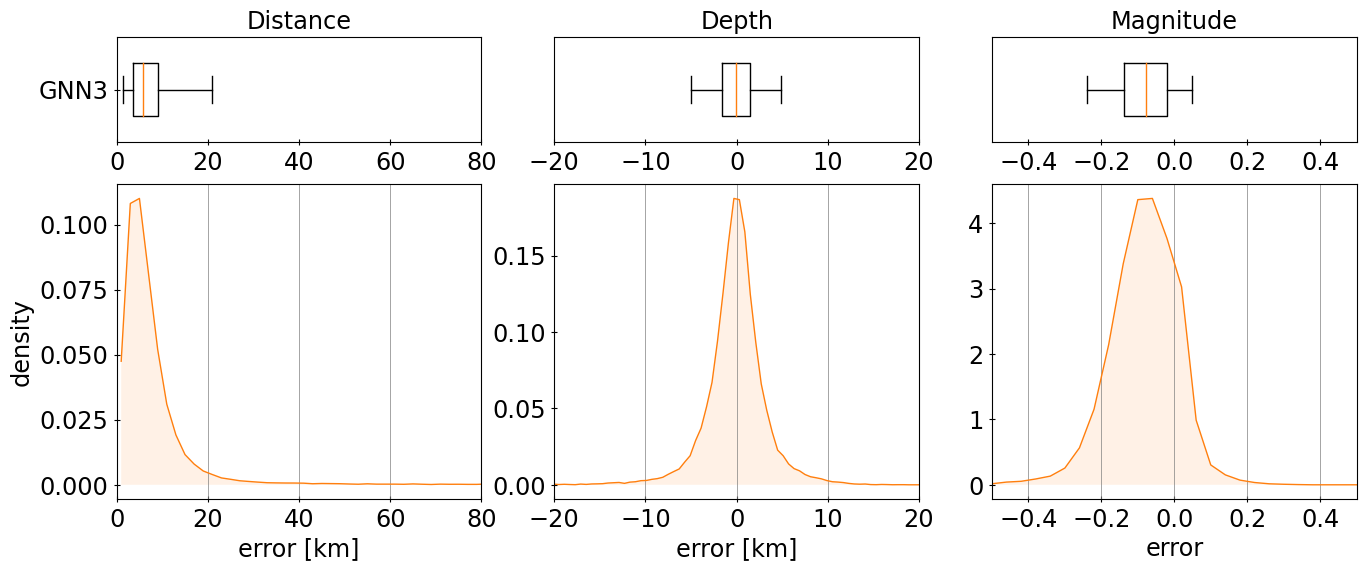

In [305]:

name = "../SCEDC/agreg-results/GNN3-DATA-select-0-0"
name_ref = "."

(results, labels, _) = pickle.load(open(name + "-all-test-results-mul.pkl", "rb"))
if name_ref != ".":
    (results_ref, labels_ref, _) = pickle.load(open(name_ref + "-all-test-results.pkl", "rb"))

fig, axs = plt.subplots(2, 3, figsize=(16, 6), gridspec_kw={'height_ratios':[1,3]})
titles = ("Distance", "Depth", "Magnitude")
err_ranges = ((0, 200), (-30, 30), (-2.0, 2.0))

def plot_density(i, results, labels, l, pos):

    ax = axs[1,i]

    if i == 0:
        lat = results[:, 0] * np.pi/180
        lat_lab = labels[:, 0] * np.pi/180
        lon = results[:, 1] * np.pi/180
        lon_lab = labels[:, 1] * np.pi/180
        test_diff = 6371 * np.arccos(np.sin(lat)*np.sin(lat_lab)+np.cos(lat)*np.cos(lat_lab)*np.cos(lon-lon_lab))
    else:
        test_diff = results[:, i+1] - labels[:, i+1]
    
    test_hist, test_bins = np.histogram(test_diff, bins=100, range=err_ranges[i], density=True)
    test_bins = 0.5 * (test_bins[1:] + test_bins[:-1])

    ax.plot(test_bins, test_hist, c="C"+str(pos), lw=1., alpha=1, label=l)
    ax.fill_between(test_bins, 0, test_hist, fc="C"+str(pos), alpha=0.1)

    ax = axs[0,i]

    ax.boxplot(test_diff, sym="", vert=False, whis=[5,95], positions=[pos], widths = 0.5, labels=[l])
    if i != 0:
        ax.set_yticks([])

axs[1,0].set_xlabel("error [km]")
axs[1,1].set_xlabel("error [km]")
axs[1,2].set_xlabel("error")
axs[1,0].set_ylabel("density")

for j in range(2):
    axs[j,0].set_xlim(0.0, 80.0)
    axs[j,1].set_xlim(-20.0, 20.0)
    axs[j,2].set_xlim(-0.5, 0.5)

absvlines = [[0, 20, 40, 60, 80], [-20, -10, 0, 10, 20], [-0.4, -0.2, 0.0, 0.2, 0.4]]


for i in range(3):
    
    for a in absvlines[i]:
        axs[1,i].axvline(a, c="grey", lw = 0.5)

    if name_ref != ".":
        plot_density(i, results_ref, labels_ref, name_ref, 0)
    plot_density(i, results, labels, "GNN3", 1)
#    axs[1,i].legend()

    axs[0,i].invert_yaxis()
    axs[0,i].set_title(titles[i])


plt.savefig(name + "-density.jpeg")





In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

models = ["../SCEDC/agreg-results/GNN1-DATA-select-0-0",
          "../SCEDC/agreg-results/GNN2-DATA-select-0-0",
          "../SCEDC/agreg-results/GNN3-DATA-select-0-0"]
name = "GNN"

fig, axs = plt.subplots(1, 3, figsize=(16, 8))
titles = ("Distance", "Depth", "Magnitude")

axs[0].set_ylabel("error [km]")
axs[1].set_ylabel("error [km]")
axs[2].set_ylabel("error")
#axs[0].set_ylim(10.0, 30.0)
#axs[1].set_ylim(3.8, 5.0)
#axs[2].set_ylim(0.15, 0.3)

for i in range(3):

    axs[i].set_xlim(-0.5, len(models)-0.5)

    for j, model in enumerate(models):

        (results, labels, index) = pickle.load(open(model + "-all-test-results-mul.pkl", "rb"))

        if i == 0:
            lat = results[:, 0] * np.pi/180
            lat_lab = labels[:, 0] * np.pi/180
            lon = results[:, 1] * np.pi/180
            lon_lab = labels[:, 1] * np.pi/180
            test_diff = 6371 * np.arccos(np.sin(lat)*np.sin(lat_lab)+np.cos(lat)*np.cos(lat_lab)*np.cos(lon-lon_lab))
        else:
            test_diff = results[:, i+1] - labels[:, i+1]

        RMSE = np.zeros((10))
        for f in range(10):
            RMSE[f] = np.sqrt(np.sum((index[:,1] == f)*np.abs(test_diff)**2)/np.sum(index[:,1] == f))
        
        axs[i].boxplot(RMSE, sym="", whis=[5,95], positions=[j], widths = 0.5, labels=[model.split("/")[-1].split("-")[0]])

    axs[i].set_title(titles[i])

plt.savefig("./images/" + name + "-boxplot.jpeg")
plt.show()



✅ Why Dynamical Graph + MPNN is Better
1. Learnable Structure (vs Fixed GCN)

   - Dynamic MPNNs build or adapt the graph structure (edges, weights) from data at each step.

   - This is crucial when true relational structure is unknown or noisy (e.g., in point clouds, particle systems, social data).

📌 Fixed GCNs assume a predefined adjacency matrix, which can be suboptimal or incorrect.

2. Relational Expressivity (vs Deep Sets)

    - MPNNs capture interactions between elements, not just aggregate them.

    - Useful in systems where pairwise (or higher-order) interactions matter (e.g., physical simulations, molecules).

📌 Deep Sets assume i.i.d. elements, and lack mechanisms for learning how elements influence each other.

3. Adaptive Topology

   - In dynamic graphs, connectivity can change with inputs or over time (e.g., based on learned attention, distances, features).

   - This supports tasks like tracking, segmentation, graph prediction, etc.

📌 Fixed graphs cannot adapt to changing relationships.

⚠️ Limitations of Dynamical MPNNs

   - Computational Overhead : Recomputing the graph and doing message passing is more expensive than Deep Sets or fixed GCNs.

   - Stability : Dynamically learning edge weights or topologies can be unstable or harder to train without regularization.

   - Interpretability : Dynamic graphs are harder to analyze or visualize, especially when edges are implicit (e.g., via attention).

   - Scalability :  For large NN, dynamic graphs can require O(N2)O(N2) memory (if fully connected or dense attention).

🧪 Summary Table

| Model Type |  Perm. Invariance | Learns Structure | Captures Interactions | Adaptive | Cost |
| ------------ | ----------------- | ---------------- | --------------------- | -------- | -----|
| Deep Sets | ✅ Yes | ❌ No | ❌ No | ❌ No | 🔋 Low |
| Fixed GCN | ❌ No (semi-local) | ❌ No | ✅ Yes (static) | ❌ No | ⚡ Medium |
| Dynamic MPNN | ✅ / ❌ (depends) |  ✅ Yes | ✅ Yes (adaptive) | ✅ Yes | 🔥 High |

## 6. Hyperparameters optimization with the Optuna package (Working in progress)

=> Add a few explanation on Optuna & the chosen sampler

In [183]:
gc.collect()
torch.cuda.empty_cache()
def main_loop(model_name="GNN1", batch_size=32, lr=0.0002, 
              K=5, nlayers=12, concat=True, L2=True,
              dropout_rate=0.15, version=3, n_epochs=800,
             patience=50, min_delta=0.0002, device="cuda:0"):
    
    best_val = np.inf
    try:
        folder = os.path.join(os.getcwd(), 'example')
        train_file = data[:-1] 
        valid_file = data[-1]
        
        strConcat = ""
        strL2 = ""
        if L2:
            strL2 = "L2"
        if concat:
            strConcat="concat"
        model_file = f"{model_name}_Ne{n_epochs}_Bs{batch_size}_lr{lr:.5f}_K{K}_Nl{nlayers}_{strConcat}_{strL2}.pt"

        #               x_train             y_train
        # Dimension 0 : évènements          évènements
        # Dimension 1 : directions (3)      labels (4)
        # Dimension 2 : stations (50)       -
        # Dimension 3 : temps (2048)        -

        x_train, y_train = arrData[0][0], arrData[0][1]
        for data_file in train_file[1:]:
            x_train = np.concatenate((x_train, arrData[0][0]), axis = 0)
            y_train = np.concatenate((y_train, arrData[0][1]), axis = 0)

        x_train = torch.permute(torch.Tensor(x_train).to(device),(0,3,1,2))
        y_train = torch.Tensor(y_train[:,2:]).to(device)
        pos = torch.Tensor(arrData[0][2].T).to(device)
        dist = torch.Tensor(arrData[0][3]).to(device)

        (x_valid, y_valid, _, _) = np.load(valid_file, allow_pickle=True)
        x_valid = torch.permute(torch.Tensor(x_valid).to(device),(0,3,1,2))
        y_valid = torch.Tensor(y_valid[:,2:]).to(device)


        knn = torch.topk(dist, K, largest=False)[1].cpu().detach().numpy()
        adj = np.zeros((len(dist), len(dist)))
        for i, row in enumerate(knn):
            for j in row:
                adj[i, j] = 1
        adj = torch.Tensor(adj).to(device)


        if model_name == "GNN1":
            model = GNN1(x_train.shape[1], pos, dropout_rate).to(device)
        elif model_name == "GNN2":
            model = GNN2(x_train.shape[1], adj, pos, dropout_rate).to(device)
        elif model_name == "GNN3":
            model = GNN3(x_train.shape[1], K, dist, pos, dropout_rate, version, nlayers).to(device)
        elif model_name == "GNN1D":
            model = GNN1_depth(x_train.shape[1], pos, dropout_rate, concat, nlayers).to(device)
        elif model_name == "GNN2D":
            model = GNN2_depth(x_train.shape[1], adj, pos, dropout_rate, concat, nlayers).to(device)


        model = model.to(device)
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        x_valid = x_valid.to(device)
        y_valid = y_valid.to(device)
        
        optimizer = torch.optim.Adam(model.parameters(),lr=lr)
        if L2:
            criterion = nn.MSELoss().to(device)
        else:
            criterion = nn.L1Loss().to(device)


        loss_dict = {"train" : [],
                    "valid" : []}
        loss_valid_min = 0
        earlyStopper = EarlyStopper(patience, min_delta)
        for epoch in range(n_epochs):

            t1 = timeit.default_timer()
            inds = np.arange(len(x_train))
            np.random.shuffle(inds)

            lossAvg = 0
            count = 0

            for k in range(0, len(x_train)-batch_size, batch_size):
                inds_k = inds[k:k+batch_size]
                results = model(x_train[inds_k])
                loss = criterion(results,y_train[inds_k])

        #        print(loss.item(),k,epoch,time()-t)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                lossAvg = loss.item()
                count +=1

            lossAvg = lossAvg / count
            loss_dict["train"].append(lossAvg)

            # Early stopping
            with torch.no_grad():
                results_valid = model(x_valid)
            loss_valid = criterion(results_valid, y_valid)
            
            if earlyStopper.early_stop(loss_valid.item()):
                print(f'Epoch {epoch+1}/{n_epochs}: {t2-t1:.2f}s - Training loss = {lossAvg:.6f} - Validation loss = {loss_valid.item():.6f}')
                break
            
            #print(loss_valid.item(), epoch, time()-t)
            if loss_valid_min == 0 or loss_valid_min > loss_valid.item():
                loss_valid_min = loss_valid.item()
                model_valid = model.state_dict()
            loss_dict["valid"].append(loss_valid.item())
            best_val = loss_valid_min

            t2 = timeit.default_timer()
            if epoch % 20 == 0:
                print(f'Epoch {epoch+1}/{n_epochs}: {t2-t1:.2f}s - Training loss = {lossAvg:.6f} - Validation loss = {loss_valid.item():.6f}')


        torch.save(model_valid, folder+"/model_"+model_file)
        np.save(folder+"/loss_"+model_file, loss_dict)
        print(loss_valid_min)
        return best_val
    except Exception as e:
        print(e)
        pass

    finally:
        return best_val

In [184]:

   
search_space = {
    'model_name' : ["GNN1", "GNN2", "GNN3"],
    'batch_size': [16, 32, 128],
    'lr': [0.00001, 0.000025, 0.00005, 0.000075, 0.0001],
    'K' : [1, 5, 10],
    'nlayers' : [4, 8, 12, 16],
    'concat' : [True, False],
    'L2' : [True, False]
}


In [185]:

def objective(trial):
    try:
        model_name = trial.suggest_categorical("model_name",search_space['model_name'])
        batch_size = int(trial.suggest_categorical("batch_size",search_space['batch_size']))
        lr = float(trial.suggest_categorical("lr",search_space['lr']))
        K = int(trial.suggest_categorical("K",search_space['K']))
        nlayers = int(trial.suggest_categorical("nlayers",search_space['nlayers']))
        concat = bool(trial.suggest_categorical("concat",search_space['concat']))
        L2 = bool(trial.suggest_categorical("L2", search_space['L2']))
        print(f"New trial : {model_name} - BS {batch_size} - lr {lr} - K {K} - nlayers {nlayers} - concat {concat} - L2 {L2} ")
        obj = main_loop(model_name, batch_size, lr,  K, nlayers, concat, L2)
    except Exception as e:
        obj = np.inf
        print(e)
        pass
    return obj

In [186]:
import optuna
N_JOBS=2
storage = "sqlite:///gnn.db"
dBName = "gnn"


if dBName in optuna.study.get_all_study_names(storage):
    optuna.study.delete_study(study_name=dBName,
                              storage=storage)


study = optuna.create_study(study_name=dBName, storage=storage, sampler=optuna.samplers.QMCSampler())


def optimize(n_trials):
    study = optuna.load_study(study_name=dBName, storage=storage)
    study.optimize(objective, n_trials=n_trials, n_jobs=N_JOBS)



/tmp/ipykernel_3984207/3479652192.py:12: ExperimentalWarning: QMCSampler is experimental (supported from v3.0.0). The interface can change in the future.
  study = optuna.create_study(study_name=dBName, storage=storage, sampler=optuna.samplers.QMCSampler())
[I 2025-06-05 10:00:05,883] A new study created in RDB with name: gnn


In [188]:
from joblib import Parallel, delayed, parallel_backend

MAX_EVALS=20

with parallel_backend('multiprocessing'):  # Overrides `prefer="threads"` to use multi-processing.
    optimize(n_trials=MAX_EVALS)

#r = Parallel(n_jobs=N_JOBS)([delayed(optimize)(MAX_EVALS) for _ in range(MAX_EVALS)])

New trial : GNN2 - BS 16 - lr 1e-05 - K 10 - nlayers 4 - concat False - L2 False 
New trial : GNN2 - BS 16 - lr 5e-05 - K 5 - nlayers 16 - concat True - L2 True 
Epoch 1/800: 678.44s - Training loss = 0.001210 - Validation loss = 0.488501


[I 2025-06-05 12:32:47,707] Trial 3 finished with value: 0.32984066009521484 and parameters: {'model_name': 'GNN2', 'batch_size': 16, 'lr': 1e-05, 'K': 10, 'nlayers': 4, 'concat': False, 'L2': False}. Best is trial 1 with value: 0.1138925850391388.


Epoch 1/800: 1400.44s - Training loss = 0.000697 - Validation loss = 0.210768
Epoch 21/800: 66.74s - Training loss = 0.000938 - Validation loss = 0.336144
Epoch 41/800: 58.10s - Training loss = 0.000904 - Validation loss = 0.334727
Epoch 21/800: 156.96s - Training loss = 0.000494 - Validation loss = 0.198347
Epoch 61/800: 33.87s - Training loss = 0.000794 - Validation loss = 0.331748
Epoch 81/800: 33.51s - Training loss = 0.000754 - Validation loss = 0.332497
Epoch 101/800: 33.91s - Training loss = 0.000800 - Validation loss = 0.334012
Epoch 41/800: 88.80s - Training loss = 0.000290 - Validation loss = 0.130740
Epoch 121/800: 33.62s - Training loss = 0.000953 - Validation loss = 0.332785
Epoch 139/800: -0.00s - Training loss = 0.000789 - Validation loss = 0.332111
0.32984066009521484
New trial : GNN1 - BS 32 - lr 7.5e-05 - K 5 - nlayers 16 - concat False - L2 False 
Epoch 1/800: 21.74s - Training loss = 0.001897 - Validation loss = 0.339505
Epoch 21/800: 21.84s - Training loss = 0.0015

[I 2025-06-05 14:08:38,154] Trial 4 finished with value: 0.18316024541854858 and parameters: {'model_name': 'GNN1', 'batch_size': 32, 'lr': 7.5e-05, 'K': 5, 'nlayers': 16, 'concat': False, 'L2': False}. Best is trial 1 with value: 0.1138925850391388.


Epoch 268/800: -0.00s - Training loss = 0.000688 - Validation loss = 0.186952
0.18316024541854858
New trial : GNN3 - BS 16 - lr 2.5e-05 - K 10 - nlayers 8 - concat False - L2 True 
Epoch 1/800: 77.92s - Training loss = 0.000685 - Validation loss = 0.209775
Epoch 121/800: 47.17s - Training loss = 0.000189 - Validation loss = 0.124986


KeyboardInterrupt: 

Epoch 141/800: 45.85s - Training loss = 0.000122 - Validation loss = 0.121684


[I 2025-06-05 14:45:08,542] Trial 5 finished with value: 0.20159859955310822 and parameters: {'model_name': 'GNN3', 'batch_size': 16, 'lr': 2.5e-05, 'K': 10, 'nlayers': 8, 'concat': False, 'L2': True}. Best is trial 1 with value: 0.1138925850391388.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.11/logging/__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "/usr/lib/python3/dist-packages/ipykernel/iostream.py", line 694, in write
    self._schedule_flush()
  File "/usr/lib/python3/dist-packages/ipykernel/iostream.py", line 590, in _schedule_flush
    self.pub_thread.schedule(_schedule_in_thread)
  File "/usr/lib/python3/dist-packages/ipykernel/iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
  File "/usr/lib/python3/dist-packages/zmq/sugar/socket.py", line 620, in send
    return super().send(data, flags=flags, copy=copy, track=track)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

Epoch 21/800: 141.11s - Training loss = 0.000660 - Validation loss = 0.202549Socket operation on non-socket
Epoch 156/800: -0.00s - Training loss = 0.000122 - Validation loss = 0.117438
0.10865287482738495


## 7. Compare to Ground Truth


In [ ]:
import pandas as pd
import seaborn as sns

true_vals = event_metadata["true"]

df = pd.DataFrame({
    "Parameter": ["Latitude", "Longitude", "Magnitude", "Depth"],
    "True": true_vals.numpy(),
    "Predicted": prediction.numpy()
})

sns.barplot(data=df.melt(id_vars="Parameter"), x="Parameter", y="value", hue="variable")
plt.title("Predicted vs. True Seismic Event Properties")
plt.ylabel("Value")
plt.show()


## 8. Optional: Map Predicted vs. True Location


In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(figsize=(10, 6), color="lightgray", edgecolor="black")

### Longitude = x, Latitude = y
plt.scatter(true_vals[1], true_vals[0], color='green', label='True Location')
plt.scatter(prediction[1], prediction[0], color='red', label='Predicted Location')
plt.legend()
plt.title("Seismic Event Location: True vs Predicted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


##  9. Conclusion
- GNNs provide an effective way to model spatial dependencies in seismic networks.
- With pre-trained models, inference is fast and suitable for near real-time analysis.
- This approach can be extended with more station data, real-time feeds, and uncertainty quantification.

**Next Steps:**
- Add edge features (e.g., travel time estimates)
- Batch inference for multiple events
- Uncertainty estimation via Bayesian GNNs
"""


## References

################################################################################################################

################################################################################################################

################################################################################################################

# Sandbox Zone (for little tests)